In [ ]:
#Amazon customer segmentation

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-03-30 12:48:41--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.138, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-03-30 12:48:41--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s    in 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('E-commerce.csv')
df.head()

ID  n_clicks  n_visits  amount_spent  amount_discount  \
0  1476       130        65    213.905831        31.600751   
1  1535       543        46    639.223004         5.689175   
2  1807       520       102   1157.402763       844.321606   
3  1727       702        83   1195.903634       850.041757   
4  1324       221        84    180.754616        64.283300   

   days_since_registration  profile_information  
0                      233                  235  
1                      228                  170  
2                      247                  409  
3                      148                  200  
4                      243                  259

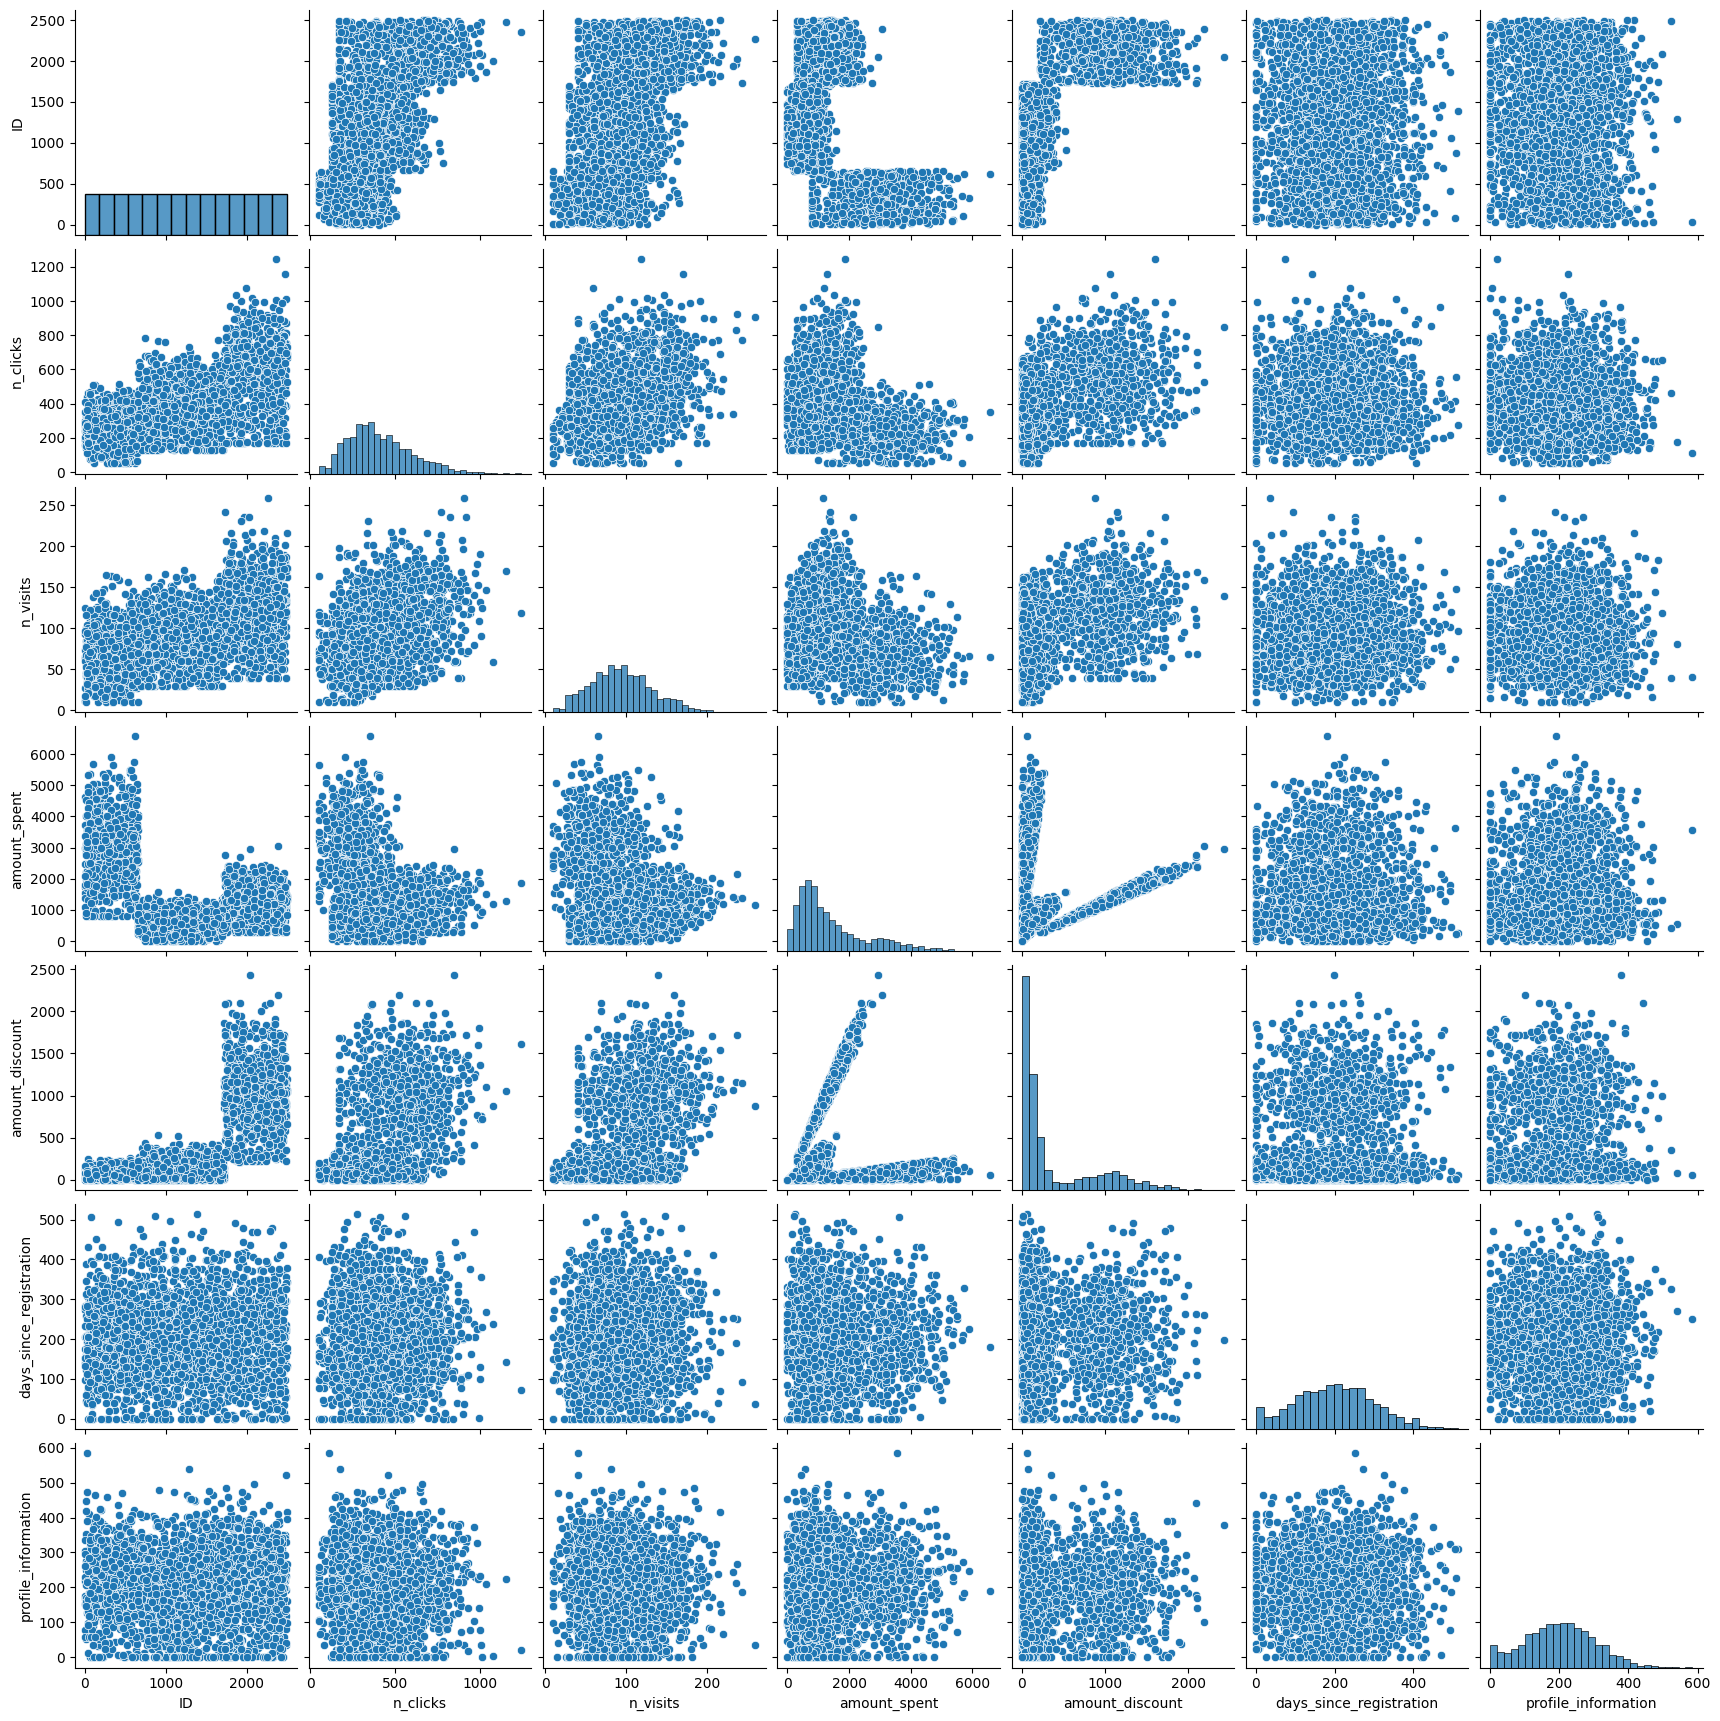

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.drop('ID',axis=1)

In [ ]:
x.head()

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  \
0       130        65    213.905831        31.600751                      233   
1       543        46    639.223004         5.689175                      228   
2       520       102   1157.402763       844.321606                      247   
3       702        83   1195.903634       850.041757                      148   
4       221        84    180.754616        64.283300                      243   

   profile_information  
0                  235  
1                  170  
2                  409  
3                  200  
4                  259

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
x.describe()

n_clicks     n_visits  amount_spent  amount_discount  \
count  2500.00000  2500.000000   2500.000000      2500.000000   
mean    408.68000    94.475600   1445.090745       388.508637   
std     186.41409    38.866356   1167.663473       487.143968   
min      50.00000    10.000000      0.000000         0.000000   
25%     274.75000    67.000000    609.618538        56.298615   
50%     378.00000    92.000000   1036.189112       137.454623   
75%     522.00000   119.000000   1949.270949       679.540536   
max    1246.00000   259.000000   6567.402267      2428.406527   

       days_since_registration  profile_information  
count              2500.000000          2500.000000  
mean                200.973600           201.040400  
std                  99.136618           100.139213  
min                   0.000000             0.000000  
25%                 130.000000           132.000000  
50%                 200.000000           201.000000  
75%                 268.000000           270.000000  
max                 514.000000           585.000000

In [ ]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

In [ ]:
#K-means

In [ ]:
from sklearn.cluster import KMeans

k=4 #arbitrary value
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred

array([2, 2, 1, ..., 3, 0, 1], dtype=int32)

In [ ]:
#co-ordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.27330589, 0.32493667, 0.11230841, 0.06740043, 0.56620473,
        0.34602498],
       [0.28589783, 0.31533458, 0.10716208, 0.06305475, 0.2394147 ,
        0.33093295]])

In [ ]:
#visualizing clusters
clusters=pd.DataFrame(x,columns=df.drop('ID',axis=1).columns)
clusters['labels']=kmeans.labels_
clusters.head()

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  \
0  0.066890  0.220884      0.032571         0.013013                 0.453307   
1  0.412207  0.144578      0.097333         0.002343                 0.443580   
2  0.392977  0.369478      0.176234         0.347685                 0.480545   
3  0.545151  0.293173      0.182097         0.350041                 0.287938   
4  0.142977  0.297189      0.027523         0.026471                 0.472763   

   profile_information  labels  
0             0.401709       2  
1             0.290598       2  
2             0.699145       1  
3             0.341880       1  
4             0.442735       2

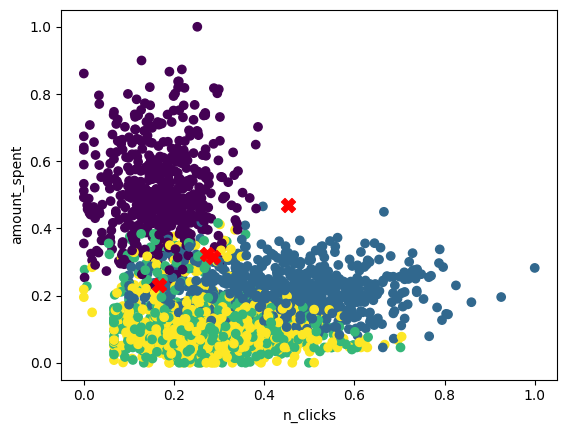

In [ ]:
def viz_clusters(kmeans):
  plt.scatter(clusters['n_clicks'],clusters['amount_spent'],c=clusters['labels'])
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='X',s=100)
  plt.xlabel('n_clicks')
  plt.ylabel('amount_spent')
viz_clusters(kmeans)


In [ ]:
#line polar plot
polar=clusters.groupby('labels').mean().reset_index()
polar=pd.melt(polar,id_vars=['labels'])
polar.head()

labels  variable     value
0       0  n_clicks  0.167630
1       1  n_clicks  0.453368
2       2  n_clicks  0.273382
3       3  n_clicks  0.285828
4       0  n_visits  0.232054

In [ ]:
import plotly.express as px
""" 'polar' : customer dataset we are using 'r' :  mean values for each feature
    which will be connected using lines 'theta' :
    variables where each of the feature will have an angle and color will be based on the label of the clusters. """

fig=px.line_polar(polar,r='value',theta='variable',color='labels',line_close=True,height=500,width=500)
fig.show()

In [ ]:
# checking with diffrent number of clusters
kmeans_iter1=KMeans(n_clusters=3,init='random',n_init=1,
                    algorithm='full',random_state=0)
kmeans_iter2=KMeans(n_clusters=5,init='random',n_init=1,
                    algorithm='full',random_state=0)
kmeans_iter3=KMeans(n_clusters=8,init='random',n_init=1,
                    algorithm='full',random_state=0)
kmeans_iter1.fit(x)
kmeans_iter2.fit(x)
kmeans_iter3.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeans(algorithm='full', init='random', n_init=1, random_state=0)

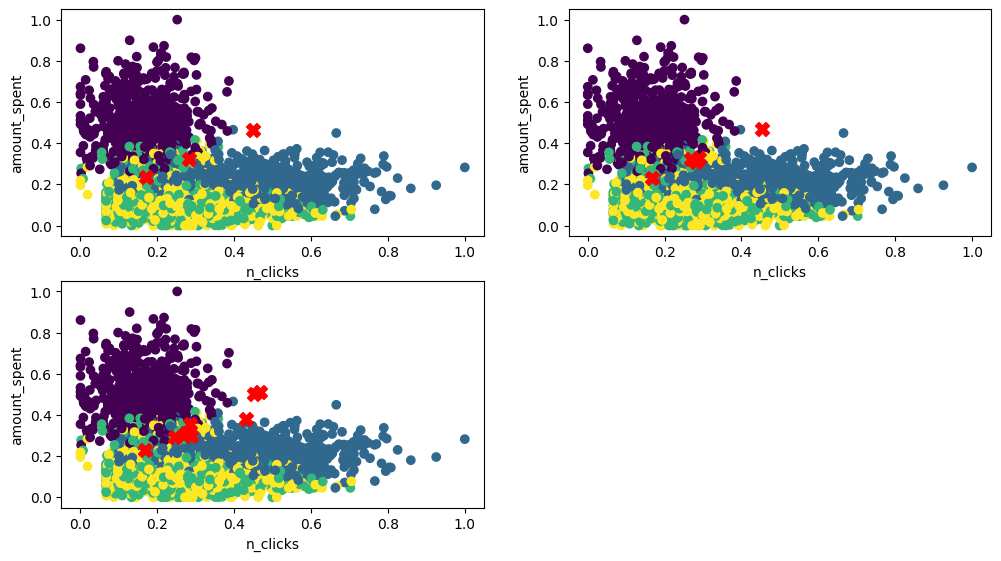

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

In [ ]:
kmeans_iter1.inertia_

280.16509626121075

In [ ]:
kmeans_iter3.inertia_

195.24159155451287

In [ ]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                  for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

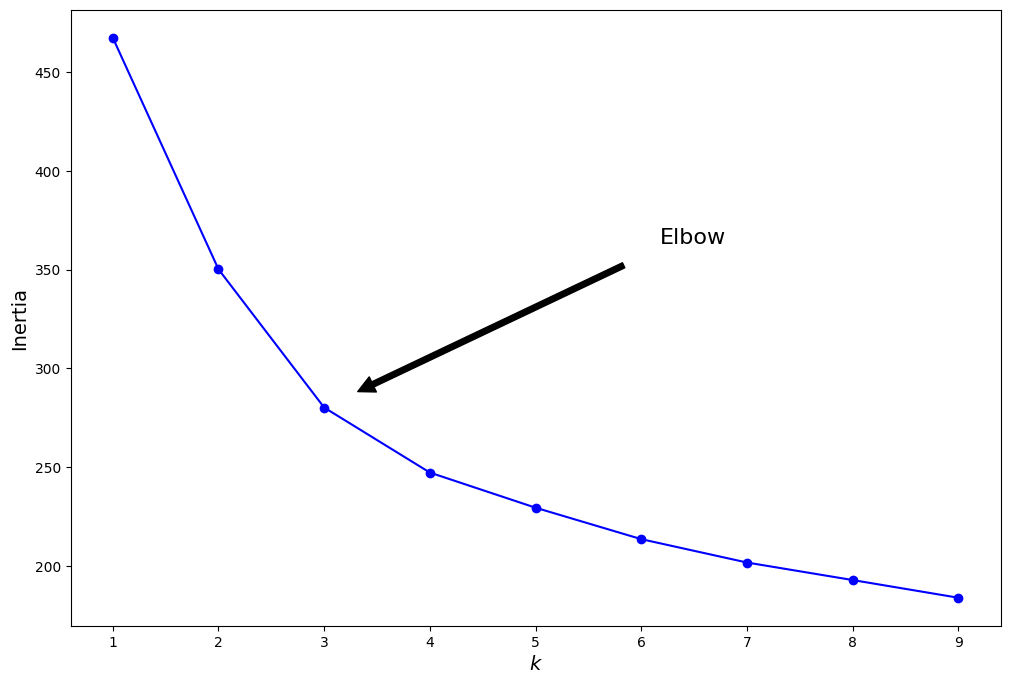

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', xy=(3, inertias[2]),
             xytext=(0.55, 0.55), textcoords='figure fraction',
             fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1) )
plt.show()

In [ ]:
#Let's try to evaluate the algorithm for different values of k using Silhouette scores.

In [ ]:
from sklearn.metrics import silhouette_score

#silhouette score for 4 clusters
silhouette_score(x,kmeans.labels_)

0.2108404992330738

In [ ]:
#plot for diffrent values for k
silhouette_scores=[silhouette_score(x,model.labels_)
                    for model in kmeans_per_k[1:]]

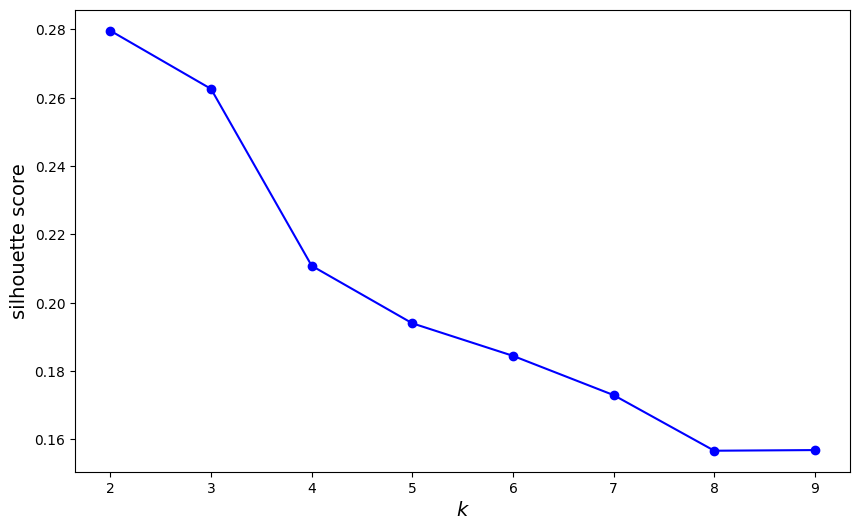

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.xlabel('$k$',fontsize=14)
plt.ylabel('silhouette score',fontsize=14)
plt.show()

In [ ]:
#Problem Statement: Building Stock Portfolios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(18,10)

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

--2024-03-31 08:34:20--  https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb
Resolving drive.google.com (drive.google.com)... 142.251.18.102, 142.251.18.100, 142.251.18.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.18.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb&export=download [following]
--2024-03-31 08:34:21--  https://drive.usercontent.google.com/download?id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.127.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3053 (3.0K) [application/octet-stream]
Saving to: ‘ind_nifty50list.csv’

ind_nifty50list.csv 100%[===================>]   2.98K  --.-

In [ ]:
#yfinance is a library that helps us download market data from yahoo finance's api.

In [ ]:
!pip install yfinance

In [ ]:
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7074 sha256=fc3e1bf60e26632bc4e680c67b20cd122e57a76609f5addbcf1a3206b95ca9a2
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix-yahoo-finance


In [ ]:
#EDA

In [ ]:
#importing data
stocks_df=pd.read_csv('ind_nifty50list.csv')

In [ ]:
list_of_symbols=list(stocks_df['Symbol'])

In [ ]:
list_of_symbols

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'IOC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SHREECEM',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

In [ ]:
stocks_df.head()

Company Name            Industry      Symbol  \
0  Adani Ports and Special Economic Zone Ltd.            SERVICES  ADANIPORTS   
1                           Asian Paints Ltd.      CONSUMER GOODS  ASIANPAINT   
2                              Axis Bank Ltd.  FINANCIAL SERVICES    AXISBANK   
3                             Bajaj Auto Ltd.          AUTOMOBILE  BAJAJ-AUTO   
4                          Bajaj Finance Ltd.  FINANCIAL SERVICES  BAJFINANCE   

  Series     ISIN Code  
0     EQ  INE742F01042  
1     EQ  INE021A01026  
2     EQ  INE238A01034  
3     EQ  INE917I01010  
4     EQ  INE296A01024

In [ ]:
yf_symbols=list(map(lambda x:x + '.NS',list_of_symbols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [ ]:
import yfinance as yf

stock_financials={'marketCap': [],
                  'regularMarketVolume': [], 'earningsQuarterlyGrowth': [],
                  'bookValue': [], 'totalRevenue': [], 'returnOnAssets': [],
                  'profitMargins': [], 'earningsGrowth': []
                  }
for ticker in yf_symbols:
  stock_info = yf.Ticker(ticker).info
  stock_financials['marketCap'].append(stock_info.get('marketCap', None))
  stock_financials['regularMarketVolume'].append(stock_info.get('regularMarketVolume', None))
  stock_financials['earningsQuarterlyGrowth'].append(stock_info.get('earningsQuarterlyGrowth', None))
  stock_financials['bookValue'].append(stock_info.get('bookValue', None))
  stock_financials['totalRevenue'].append(stock_info.get('totalRevenue', None))
  stock_financials['returnOnAssets'].append(stock_info.get('returnOnAssets', None))
  stock_financials['profitMargins'].append(stock_info.get('profitMargins', None))
  stock_financials['earningsGrowth'].append(stock_info.get('earningsGrowth', None))

In [ ]:
df=pd.DataFrame(stock_financials)
df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  bookValue  \
0  2898583879680              4182890                    0.679    178.814   
1  2729583312896              1863781                    0.350    172.706   
2  3234402664448             10229762                    0.049    484.056   
3  2553980649472               846341                    0.380   1036.725   
4  4475680980992              3573581                    0.224    989.308   

   totalRevenue  returnOnAssets  profitMargins  earningsGrowth  
0  256109101056             NaN        0.28230           0.678  
1  354908110848             NaN        0.15321           0.349  
2  622467022848         0.01008        0.21568           0.053  
3  432663396352             NaN        0.17107           0.380  
4  301745700864             NaN        0.45682           0.209

In [ ]:
df.shape

(50, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                50 non-null     int64  
 1   regularMarketVolume      50 non-null     int64  
 2   earningsQuarterlyGrowth  48 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             50 non-null     int64  
 5   returnOnAssets           11 non-null     float64
 6   profitMargins            50 non-null     float64
 7   earningsGrowth           47 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 3.2 KB


In [ ]:
import yfinance as yf

stock_prices=yf.download(yf_symbols,start='2020-01-01')['Adj Close']
stock_prices.columns=list_of_symbols


[*********************100%%**********************]  50 of 50 completed


In [ ]:
stock_prices.shape

(1052, 50)

In [ ]:
stock_prices.tail()

ADANIPORTS   ASIANPAINT     AXISBANK   BAJAJ-AUTO   BAJFINANCE  \
Date                                                                          
2024-03-21  1262.449951  2821.149902  1035.599976  8750.599609  1602.599976   
2024-03-22  1281.599976  2841.500000  1033.300049  8945.250000  1587.550049   
2024-03-26  1304.199951  2814.649902  1040.550049  8960.549805  1593.900024   
2024-03-27  1322.800049  2830.500000  1052.849976  9162.500000  1582.650024   
2024-03-28  1341.849976  2846.750000  1047.199951  9148.150391  1643.849976   

             BAJAJFINSV         BPCL  BHARTIARTL    BRITANNIA        CIPLA  \
Date                                                                         
2024-03-21  6715.750000  1220.800049  587.799988  4806.700195  1448.699951   
2024-03-22  6760.899902  1236.099976  592.799988  4865.000000  1481.250000   
2024-03-26  6910.100098  1213.099976  599.849976  4961.450195  1472.250000   
2024-03-27  7022.750000  1224.800049  595.200012  4920.200195  1463.349976   
2024-03-28  7245.250000  1228.599976  602.400024  4911.250000  1496.949951   

            ...    SUNPHARMA          TCS  TATACONSUM  TATAMOTORS  \
Date        ...                                                     
2024-03-21  ...  1565.199951  1133.949951  964.900024  150.100006   
2024-03-22  ...  1608.900024  1122.750000  979.799988  151.800003   
2024-03-26  ...  1598.099976  1112.550049  986.200012  152.399994   
2024-03-27  ...  1604.150024  1091.050049  978.650024  152.699997   
2024-03-28  ...  1620.550049  1096.199951  992.799988  155.850006   

              TATASTEEL        TECHM        TITAN          UPL  ULTRACEMCO  \
Date                                                                         
2024-03-21  3972.949951  1282.750000  3627.550049  9600.750000  455.549988   
2024-03-22  3910.899902  1262.650024  3706.699951  9681.750000  470.000000   
2024-03-26  3877.500000  1254.349976  3698.199951  9600.700195  465.399994   
2024-03-27  3840.899902  1253.800049  3759.399902  9623.450195  455.500000   
2024-03-28  3876.300049  1248.099976  3801.800049  9749.150391  456.000000   

                 WIPRO  
Date                    
2024-03-21  500.450012  
2024-03-22  487.100006  
2024-03-26  479.850006  
2024-03-27  472.299988  
2024-03-28  480.100006  

[5 rows x 50 columns]

In [ ]:
# splitting data by year - 2020 returns
price_2020 = stock_prices.loc["2020-01-02 00:00:00":"2020-12-31 00:00:00"]
# to see % growth of the stock: ((endDate/startDate) - 1) * 100
stock_prices.loc['returns_2020'] = (price_2020.loc['2020-08-04 00:00:00'] / price_2020.loc['2020-01-02 00:00:00'] - 1)*100
stock_prices

ADANIPORTS   ASIANPAINT     AXISBANK   BAJAJ-AUTO  \
Date                                                                      
2020-01-01 00:00:00   365.911530  1743.498535   746.799988  2725.097900   
2020-01-02 00:00:00   371.240601  1741.019165   755.029053  2699.924072   
2020-01-03 00:00:00   370.610779  1702.857178   741.064575  2657.578369   
2020-01-06 00:00:00   368.382294  1659.833374   721.414551  2627.819336   
2020-01-07 00:00:00   372.839264  1676.605469   723.908203  2628.078857   
...                          ...          ...          ...          ...   
2024-03-22 00:00:00  1281.599976  2841.500000  1033.300049  8945.250000   
2024-03-26 00:00:00  1304.199951  2814.649902  1040.550049  8960.549805   
2024-03-27 00:00:00  1322.800049  2830.500000  1052.849976  9162.500000   
2024-03-28 00:00:00  1341.849976  2846.750000  1047.199951  9148.150391   
returns_2020          -16.891367    -3.813719   -43.305368    -0.566458   

                      BAJFINANCE   BAJAJFINSV         BPCL  BHARTIARTL  \
Date                                                                     
2020-01-01 00:00:00   936.260925  4181.726074   439.373932  372.358185   
2020-01-02 00:00:00   948.954407  4196.303223   441.215546  369.252930   
2020-01-03 00:00:00   933.006470  4144.319824   441.118652  366.185608   
2020-01-06 00:00:00   902.742615  3949.875244   435.836060  355.317413   
2020-01-07 00:00:00   908.028748  3960.696777   431.425873  349.144928   
...                          ...          ...          ...         ...   
2024-03-22 00:00:00  1587.550049  6760.899902  1236.099976  592.799988   
2024-03-26 00:00:00  1593.900024  6910.100098  1213.099976  599.849976   
2024-03-27 00:00:00  1582.650024  7022.750000  1224.800049  595.200012   
2024-03-28 00:00:00  1643.849976  7245.250000  1228.599976  602.400024   
returns_2020          -35.138669   -23.622256    20.606338  -11.615299   

                       BRITANNIA        CIPLA  ...    SUNPHARMA          TCS  \
Date                                           ...                             
2020-01-01 00:00:00  2787.020752   466.001099  ...   413.836639   313.626373   
2020-01-02 00:00:00  2799.627930   463.651001  ...   414.455994   313.142120   
2020-01-03 00:00:00  2786.241455   460.174866  ...   423.651367   308.154694   
2020-01-06 00:00:00  2770.883545   457.041412  ...   419.220428   302.247314   
2020-01-07 00:00:00  2784.224365   458.852966  ...   425.366547   304.958893   
...                          ...          ...  ...          ...          ...   
2024-03-22 00:00:00  4865.000000  1481.250000  ...  1608.900024  1122.750000   
2024-03-26 00:00:00  4961.450195  1472.250000  ...  1598.099976  1112.550049   
2024-03-27 00:00:00  4920.200195  1463.349976  ...  1604.150024  1091.050049   
2024-03-28 00:00:00  4911.250000  1496.949951  ...  1620.550049  1096.199951   
returns_2020           26.413091    51.151879  ...    22.489646    40.114331   

                     TATACONSUM  TATAMOTORS    TATASTEEL        TECHM  \
Date                                                                    
2020-01-01 00:00:00  183.876907   40.974754  1999.318481   667.991150   
2020-01-02 00:00:00  193.148010   42.472710  1990.141113   671.453491   
2020-01-03 00:00:00  190.506256   42.371967  2029.802979   679.385864   
2020-01-06 00:00:00  185.073181   41.456551  2029.618286   675.266296   
2020-01-07 00:00:00  184.126129   41.706211  2034.599487   681.139038   
...                         ...         ...          ...          ...   
2024-03-22 00:00:00  979.799988  151.800003  3910.899902  1262.650024   
2024-03-26 00:00:00  986.200012  152.399994  3877.500000  1254.349976   
2024-03-27 00:00:00  978.650024  152.699997  3840.899902  1253.800049   
2024-03-28 00:00:00  992.799988  155.850006  3876.300049  1248.099976   
returns_2020         -42.477418  -23.223683     5.812797   -12.938686   

                           TITAN          UPL  ULTRACEMCO       WIPRO  
Date                

In [ ]:
stock_prices=stock_prices.transpose()
stock_prices.head()

Date        2020-01-01 00:00:00  2020-01-02 00:00:00  2020-01-03 00:00:00  \
ADANIPORTS           365.911530           371.240601           370.610779   
ASIANPAINT          1743.498535          1741.019165          1702.857178   
AXISBANK             746.799988           755.029053           741.064575   
BAJAJ-AUTO          2725.097900          2699.924072          2657.578369   
BAJFINANCE           936.260925           948.954407           933.006470   

Date        2020-01-06 00:00:00  2020-01-07 00:00:00  2020-01-08 00:00:00  \
ADANIPORTS           368.382294           372.839264           373.662872   
ASIANPAINT          1659.833374          1676.605469          1680.883667   
AXISBANK             721.414551           723.908203           722.661377   
BAJAJ-AUTO          2627.819336          2628.078857          2646.505127   
BAJFINANCE           902.742615           908.028748           913.005310   

Date        2020-01-09 00:00:00  2020-01-10 00:00:00  2020-01-13 00:00:00  \
ADANIPORTS           379.621704           379.863953           378.216797   
ASIANPAINT          1723.420898          1742.866455          1754.874268   
AXISBANK             740.964844           738.171997           735.528687   
BAJAJ-AUTO          2669.386475          2682.795410          2676.610107   
BAJFINANCE           937.938049           935.641968           943.927979   

Date        2020-01-14 00:00:00  ...  2024-03-15 00:00:00  \
ADANIPORTS           377.102539  ...          1283.000000   
ASIANPAINT          1768.729248  ...          2867.550049   
AXISBANK             746.002014  ...          1046.400024   
BAJAJ-AUTO          2683.141602  ...          8350.700195   
BAJFINANCE           953.871155  ...          1571.449951   

Date        2024-03-18 00:00:00  2024-03-19 00:00:00  2024-03-20 00:00:00  \
ADANIPORTS          1266.599976          1241.199951          1245.400024   
ASIANPAINT          2846.500000          2815.100098          2824.899902   
AXISBANK            1061.349976          1050.800049          1034.750000   
BAJAJ-AUTO          8521.799805          8640.200195          8635.599609   
BAJFINANCE          1577.050049          1581.500000          1584.699951   

Date        2024-03-21 00:00:00  2024-03-22 00:00:00  2024-03-26 00:00:00  \
ADANIPORTS          1262.449951          1281.599976          1304.199951   
ASIANPAINT          2821.149902          2841.500000          2814.649902   
AXISBANK            1035.599976          1033.300049          1040.550049   
BAJAJ-AUTO          8750.599609          8945.250000          8960.549805   
BAJFINANCE          1602.599976          1587.550049          1593.900024   

Date        2024-03-27 00:00:00  2024-03-28 00:00:00  returns_2020  
ADANIPORTS          1322.800049          1341.849976    -16.891367  
ASIANPAINT          2830.500000          2846.750000     -3.813719  
AXISBANK            1052.849976          1047.199951    -43.305368  
BAJAJ-AUTO          9162.500000          9148.150391     -0.566458  
BAJFINANCE          1582.650024          1643.849976    -35.138669  

[5 rows x 1053 columns]

In [ ]:
#putting the data together
prices=stock_prices.iloc[:,-1]
df.index=stock_prices.index
df['return_2020']=prices
df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  2898583879680              4182890                    0.679   
ASIANPAINT  2729583312896              1863781                    0.350   
AXISBANK    3234402664448             10229762                    0.049   
BAJAJ-AUTO  2553980649472               846341                    0.380   
BAJFINANCE  4475680980992              3573581                    0.224   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS    178.814  256109101056             NaN        0.28230   
ASIANPAINT    172.706  354908110848             NaN        0.15321   
AXISBANK      484.056  622467022848         0.01008        0.21568   
BAJAJ-AUTO   1036.725  432663396352             NaN        0.17107   
BAJFINANCE    989.308  301745700864             NaN        0.45682   

            earningsGrowth  return_2020  
ADANIPORTS           0.678   -16.891367  
ASIANPAINT           0.349    -3.813719  
AXISBANK             0.053   -43.305368  
BAJAJ-AUTO           0.380    -0.566458  
BAJFINANCE           0.209   -35.138669

In [ ]:
#checking for null values
df.isna().sum()

marketCap                   0
regularMarketVolume         0
earningsQuarterlyGrowth     2
bookValue                   1
totalRevenue                0
returnOnAssets             39
profitMargins               0
earningsGrowth              3
return_2020                 1
dtype: int64

In [ ]:
df['returnOnAssets']=df['returnOnAssets'].replace(np.nan,0)

In [ ]:
df.dropna(axis=0,inplace=True)
df.shape

(45, 9)

In [ ]:
df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  2898583879680              4182890                    0.679   
ASIANPAINT  2729583312896              1863781                    0.350   
AXISBANK    3234402664448             10229762                    0.049   
BAJAJ-AUTO  2553980649472               846341                    0.380   
BAJFINANCE  4475680980992              3573581                    0.224   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS    178.814  256109101056         0.00000        0.28230   
ASIANPAINT    172.706  354908110848         0.00000        0.15321   
AXISBANK      484.056  622467022848         0.01008        0.21568   
BAJAJ-AUTO   1036.725  432663396352         0.00000        0.17107   
BAJFINANCE    989.308  301745700864         0.00000        0.45682   

            earningsGrowth  return_2020  
ADANIPORTS           0.678   -16.891367  
ASIANPAINT           0.349    -3.813719  
AXISBANK             0.053   -43.305368  
BAJAJ-AUTO           0.380    -0.566458  
BAJFINANCE           0.209   -35.138669

In [ ]:
df.isna().sum()

marketCap                  0
regularMarketVolume        0
earningsQuarterlyGrowth    0
bookValue                  0
totalRevenue               0
returnOnAssets             0
profitMargins              0
earningsGrowth             0
return_2020                0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df)
x=scaler.transform(df)

In [ ]:
scaled_df=pd.DataFrame(x,columns=df.columns,index=df.index)

In [ ]:
scaled_df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  -0.203534            -0.418083                 0.109108   
ASIANPAINT  -0.252300            -0.678134                -0.088222   
AXISBANK    -0.106633             0.259978                -0.268758   
BAJAJ-AUTO  -0.302970            -0.792224                -0.070229   
BAJFINANCE   0.251541            -0.486407                -0.163795   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS  -0.467325     -0.583201       -0.403534       1.330562   
ASIANPAINT  -0.474248     -0.530702       -0.403534       0.005802   
AXISBANK    -0.121322     -0.388528       -0.238697       0.646888   
BAJAJ-AUTO   0.505148     -0.489385       -0.403534       0.189086   
BAJFINANCE   0.451399     -0.558951       -0.403534       3.121540   

            earningsGrowth  return_2020  
ADANIPORTS        0.109598    -0.398916  
ASIANPAINT       -0.087511     0.058572  
AXISBANK         -0.264850    -1.322943  
BAJAJ-AUTO       -0.068938     0.172169  
BAJFINANCE       -0.171387    -1.037252

In [ ]:
# performing agglomerative clustering

In [ ]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

z=sch.linkage(scaled_df,method='ward')

In [ ]:
z.shape

(44, 4)

Text(0, 0.5, 'distance')

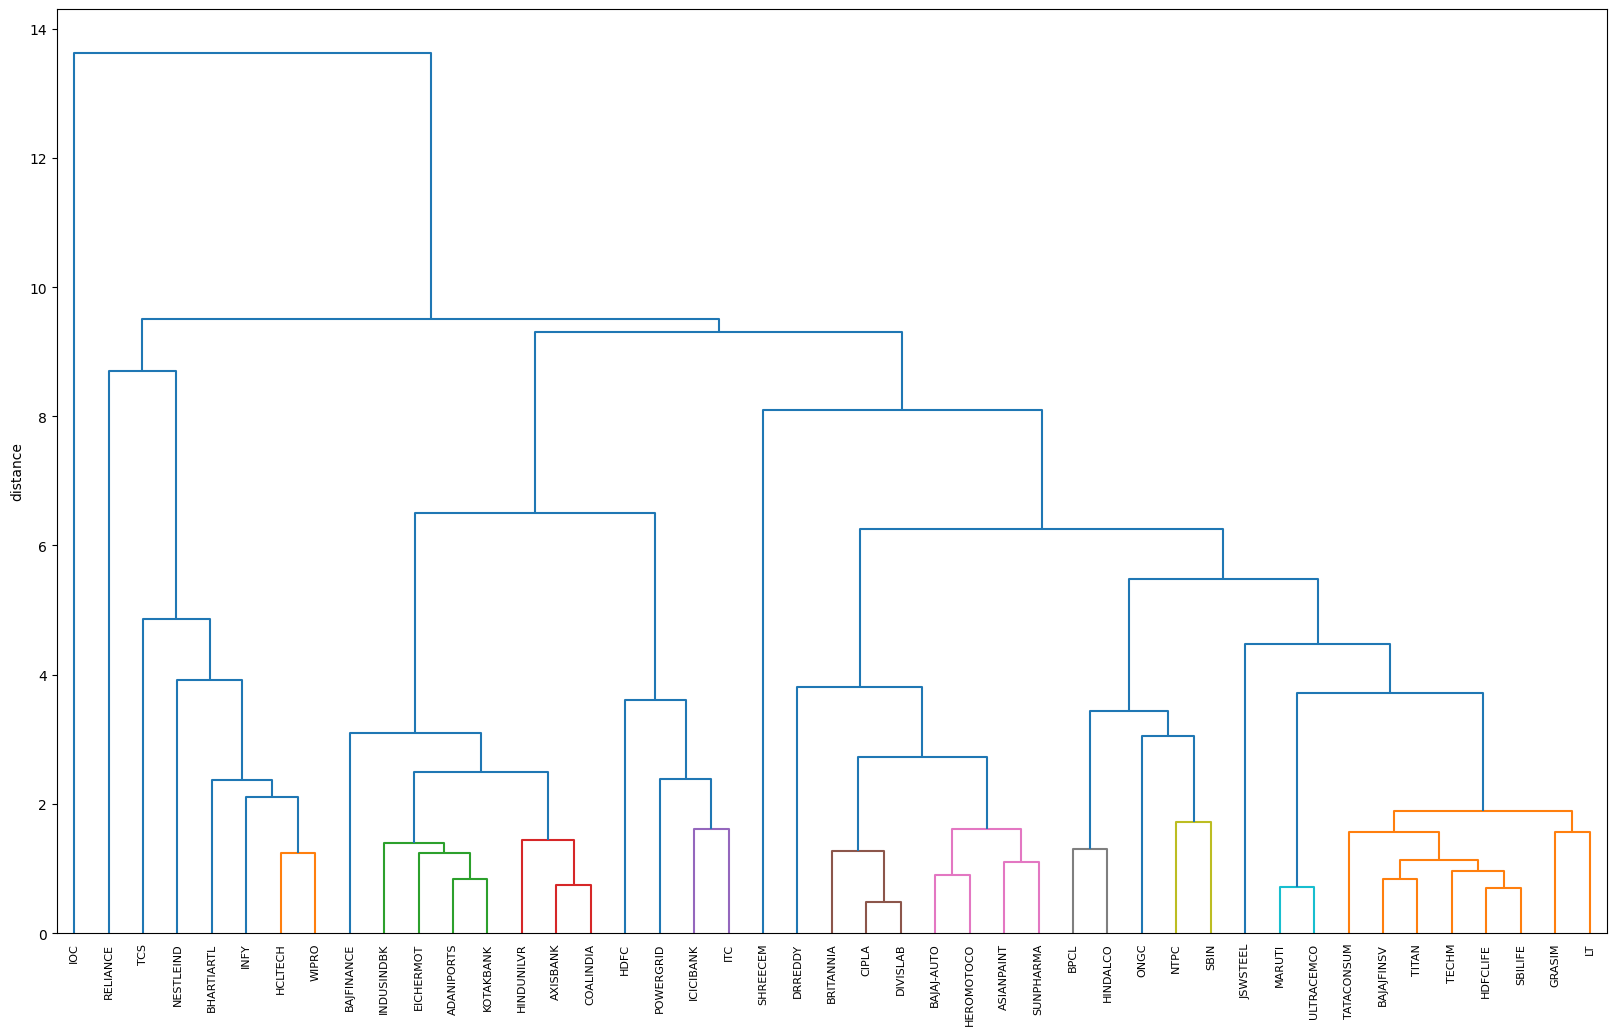

In [ ]:
fig,ax=plt.subplots(figsize=(20,12))
sch.dendrogram(z,labels=scaled_df.index,ax=ax,color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

Text(0, 0.5, 'distance')

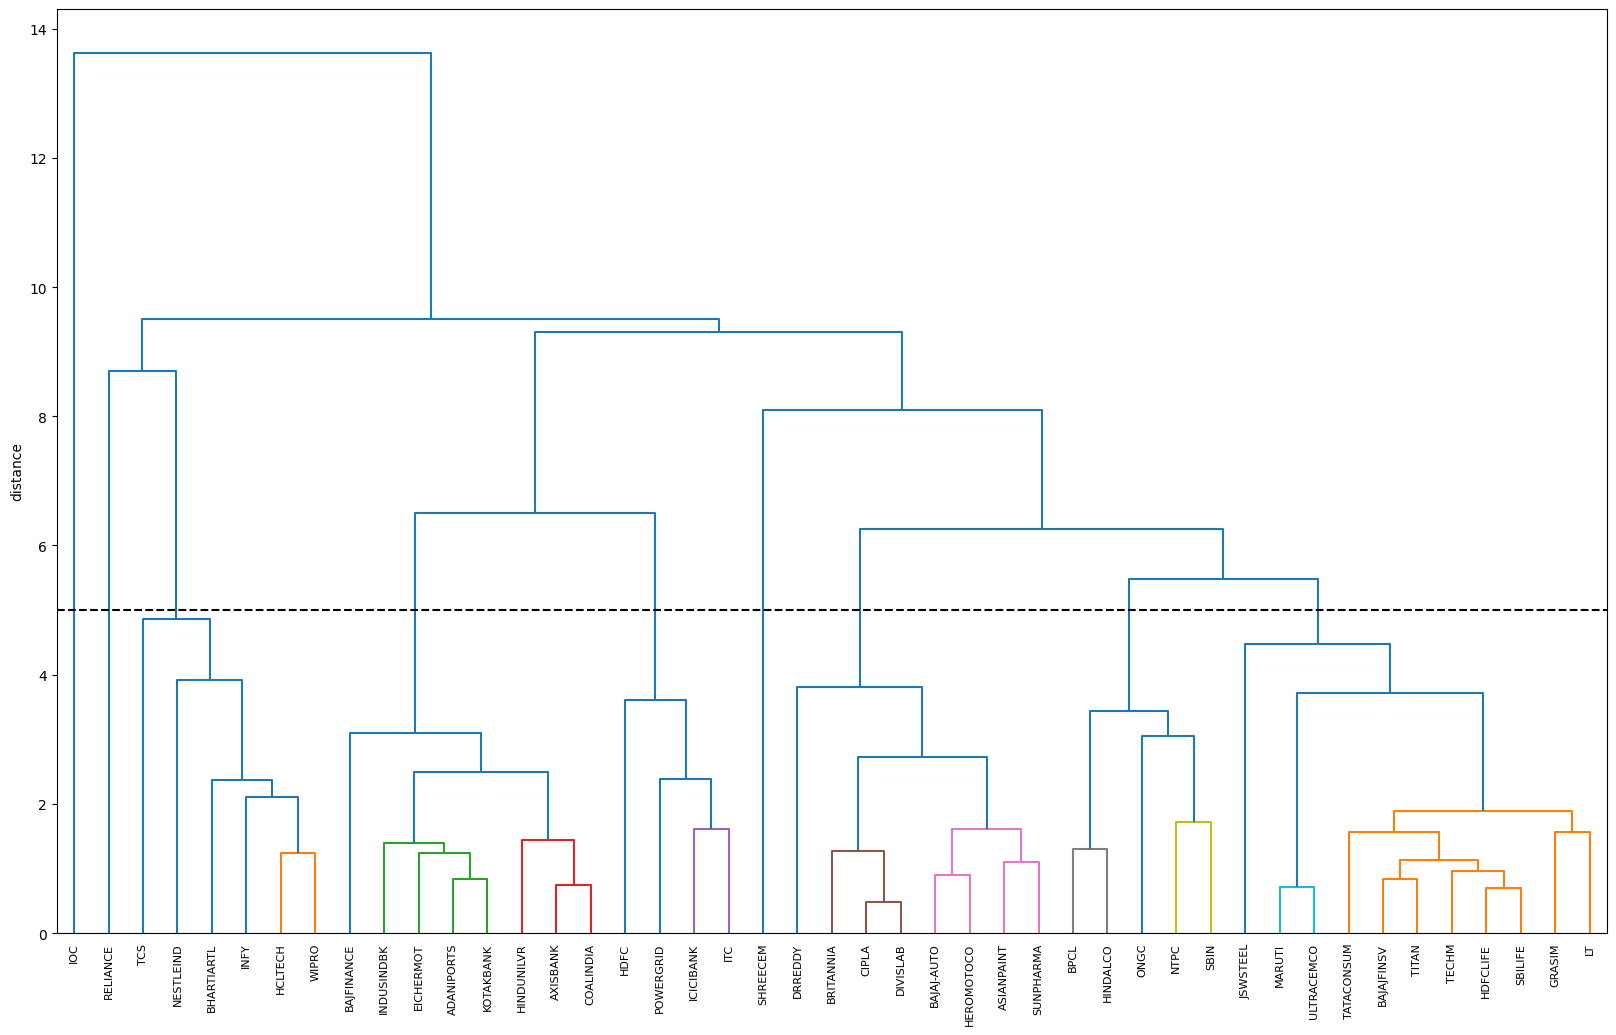

In [ ]:
#calculating the number of clusters
fig,ax=plt.subplots(figsize=(20,12))
sch.dendrogram(z,labels=scaled_df.index,ax=ax,color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=5,color='k',linestyle='--')
ax.set_ylabel('distance')

In [ ]:
# perform agglomerative clustering with 5 clusters

In [ ]:
#import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

#create clusters
hc_2020=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred=hc_2020.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 3, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2])

In [ ]:
viz_df=scaled_df
viz_df['y_pred']=y_pred

In [ ]:
viz_df.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  -0.203534            -0.418083                 0.109108   
ASIANPAINT  -0.252300            -0.678134                -0.088222   
AXISBANK    -0.106633             0.259978                -0.268758   
BAJAJ-AUTO  -0.302970            -0.792224                -0.070229   
BAJFINANCE   0.251541            -0.486407                -0.163795   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS  -0.467325     -0.583201       -0.403534       1.330562   
ASIANPAINT  -0.474248     -0.530702       -0.403534       0.005802   
AXISBANK    -0.121322     -0.388528       -0.238697       0.646888   
BAJAJ-AUTO   0.505148     -0.489385       -0.403534       0.189086   
BAJFINANCE   0.451399     -0.558951       -0.403534       3.121540   

            earningsGrowth  return_2020  y_pred  
ADANIPORTS        0.109598    -0.398916       1  
ASIANPAINT       -0.087511     0.058572       0  
AXISBANK         -0.264850    -1.322943       1  
BAJAJ-AUTO       -0.068938     0.172169       0  
BAJFINANCE       -0.171387    -1.037252       1

In [ ]:
#plotting the characterstics of the learned datasets

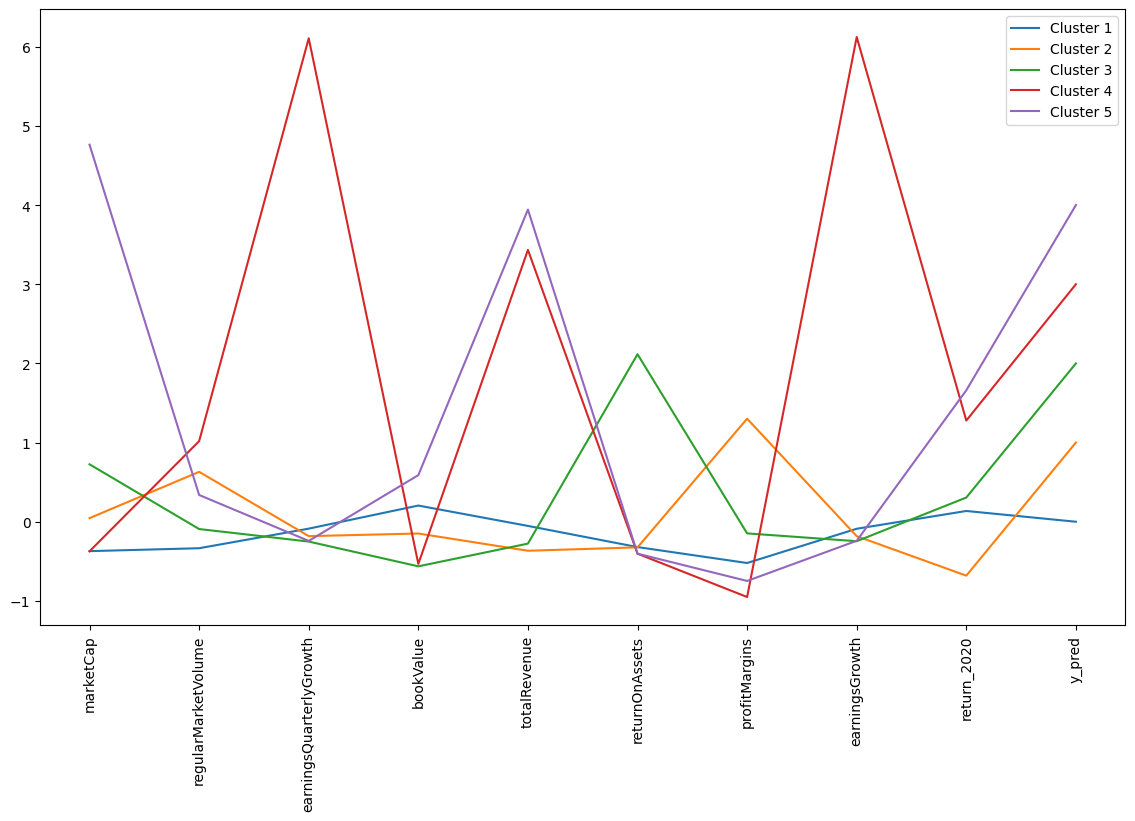

In [ ]:
#plot a line graph to see the characterstics of the clusters
scaled_df['label']=pd.Series(y_pred,index=scaled_df.index)

clustered_df=scaled_df.groupby('label').mean()
labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
plt.figure(figsize=(14,8))
plt.plot(clustered_df.T,label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

In [ ]:
#Looking at this, What characteristics do we find unique in each of these learned cluster?
#Cluster 1 - Companies with average market capital, quarterly growth, total revenue returning average returns
#Cluster 2 - Companies havning largest market capital, with low quaterly growth (because they are already dominating), high total revenue, and highest return
#Cluster 3- Trader's favourites - high market volume with good profit margins.
#Cluster 4 - Low market capital, with low quarterly growth, having high total revenue, with second largest returns
#Cluster 5 - low market cap, with very high quarterly growth, but lowest total revenue and returns

In [ ]:
#Comparing Hierarchical Clustering with K-Means++

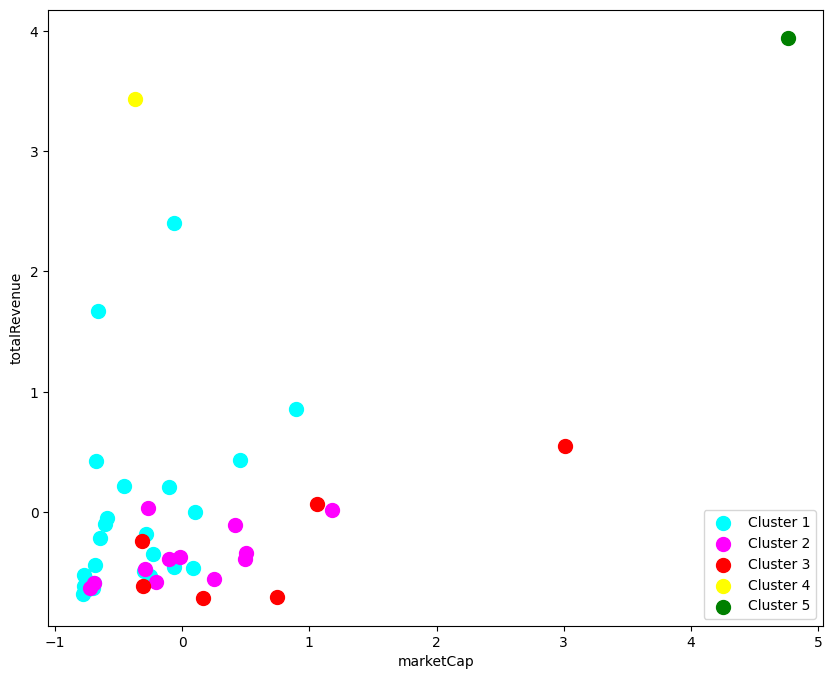

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['y_pred'] == 0]['marketCap'], viz_df[viz_df['y_pred'] == 0]['totalRevenue'], s=100, c='Cyan', label='Cluster 1')
plt.scatter(viz_df[viz_df['y_pred'] == 1]['marketCap'], viz_df[viz_df['y_pred'] == 1]['totalRevenue'], s=100, c='Magenta', label='Cluster 2')
plt.scatter(viz_df[viz_df['y_pred'] == 2]['marketCap'], viz_df[viz_df['y_pred'] == 2]['totalRevenue'], s=100, c='Red', label='Cluster 3')
plt.scatter(viz_df[viz_df['y_pred'] == 3]['marketCap'], viz_df[viz_df['y_pred'] == 3]['totalRevenue'], s=100, c='Yellow', label='Cluster 4')
plt.scatter(viz_df[viz_df['y_pred'] == 4]['marketCap'], viz_df[scaled_df['y_pred'] == 4]['totalRevenue'], s=100, c='Green', label='Cluster 5')
plt.xlabel('marketCap')
plt.ylabel('totalRevenue')
plt.legend()
plt.show()

In [ ]:
#also see K-Means++ results which would give more intuition.

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,init='k-means++',random_state=50)
y_km=km.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
viz_df['km_pred']=y_km

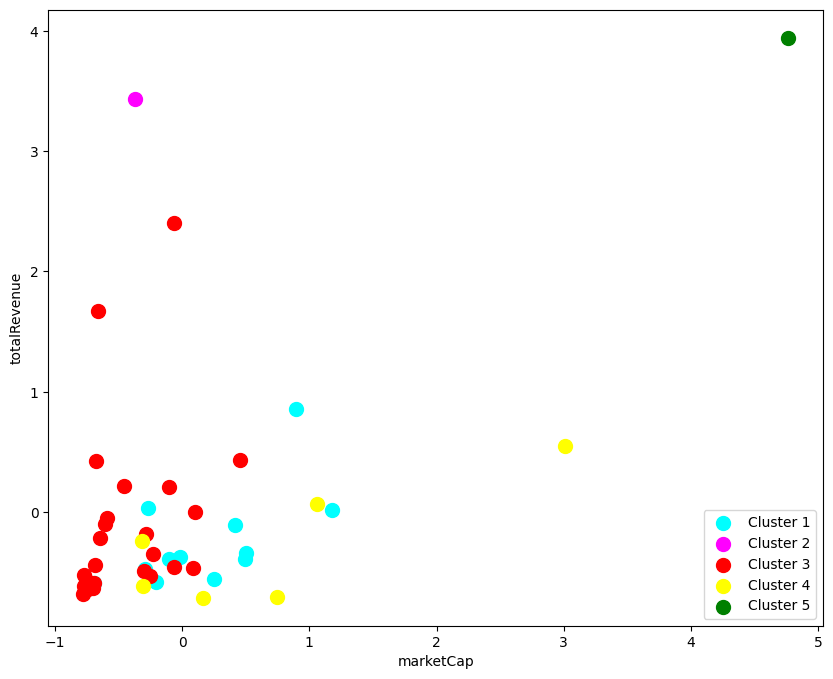

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['km_pred'] == 0]['marketCap'], viz_df[viz_df['km_pred'] == 0]['totalRevenue'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(viz_df[viz_df['km_pred'] == 1]['marketCap'], viz_df[viz_df['km_pred'] == 1]['totalRevenue'], s=100, c='Magenta', label = 'Cluster 2')
plt.scatter(viz_df[viz_df['km_pred'] == 2]['marketCap'], viz_df[viz_df['km_pred'] == 2]['totalRevenue'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(viz_df[viz_df['km_pred'] == 3]['marketCap'], viz_df[viz_df['km_pred'] == 3]['totalRevenue'], s=100, c='Yellow', label = 'Cluster 4')
plt.scatter(viz_df[viz_df['km_pred'] == 4]['marketCap'], viz_df[scaled_df['km_pred'] == 4]['totalRevenue'], s=100, c='Green', label = 'Cluster 5')
plt.xlabel('marketCap')
plt.ylabel('totalRevenue')
plt.legend()
plt.show()

In [ ]:
#GMM implementation

In [ ]:
!gdown 1TyC3sl4OM-NhmUTcCt4NN8nDZOWHOBrh

Downloading...
From: https://drive.google.com/uc?id=1TyC3sl4OM-NhmUTcCt4NN8nDZOWHOBrh
To: /content/std_df_gmm.pkl
100% 7.19k/7.19k [00:00<00:00, 15.1MB/s]


In [ ]:
!gdown 1Z6nMciyzLvw9fdt8ajdNDebkRTbj5FW-

Downloading...
From: https://drive.google.com/uc?id=1Z6nMciyzLvw9fdt8ajdNDebkRTbj5FW-
To: /content/df_gmm.pkl
100% 7.71k/7.71k [00:00<00:00, 8.10MB/s]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,12)

In [ ]:
import pickle

In [ ]:
with open('/content/std_df_gmm.pkl','rb') as f:
  std_df = pickle.load(f)
with open('/content/df_gmm.pkl','rb') as f:
  df = pickle.load(f)

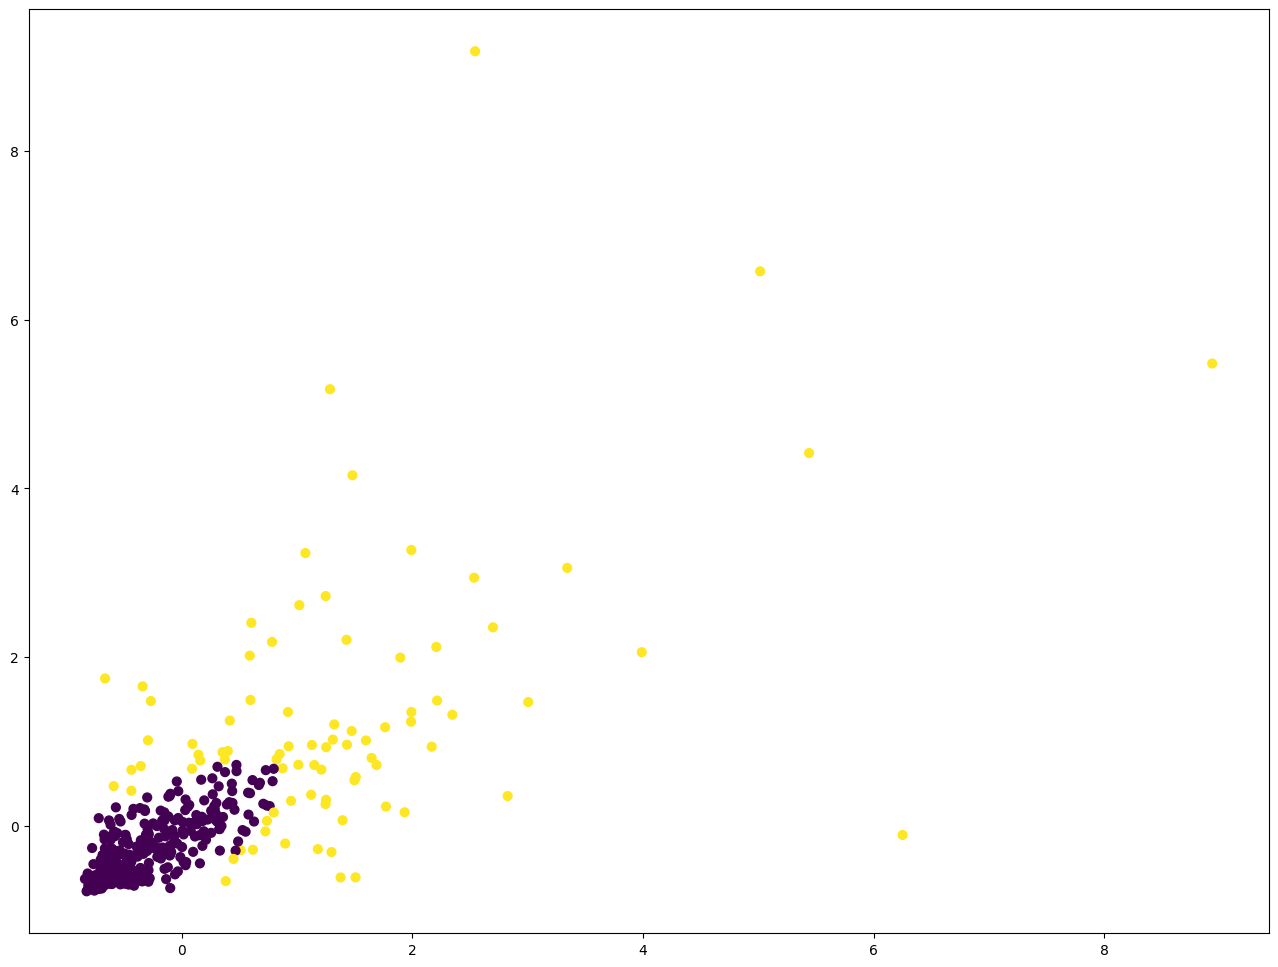

In [ ]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=2).fit(std_df)
labels=gmm.predict(std_df)
plt.scatter(std_df[:,0],std_df[:,1],c=labels,s=40,cmap='viridis')

In [ ]:
#comparing with K-Means
from sklearn.cluster import KMeans
k=2 # arbitrary value
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters=df.copy()
clusters['label']=kmeans.labels_

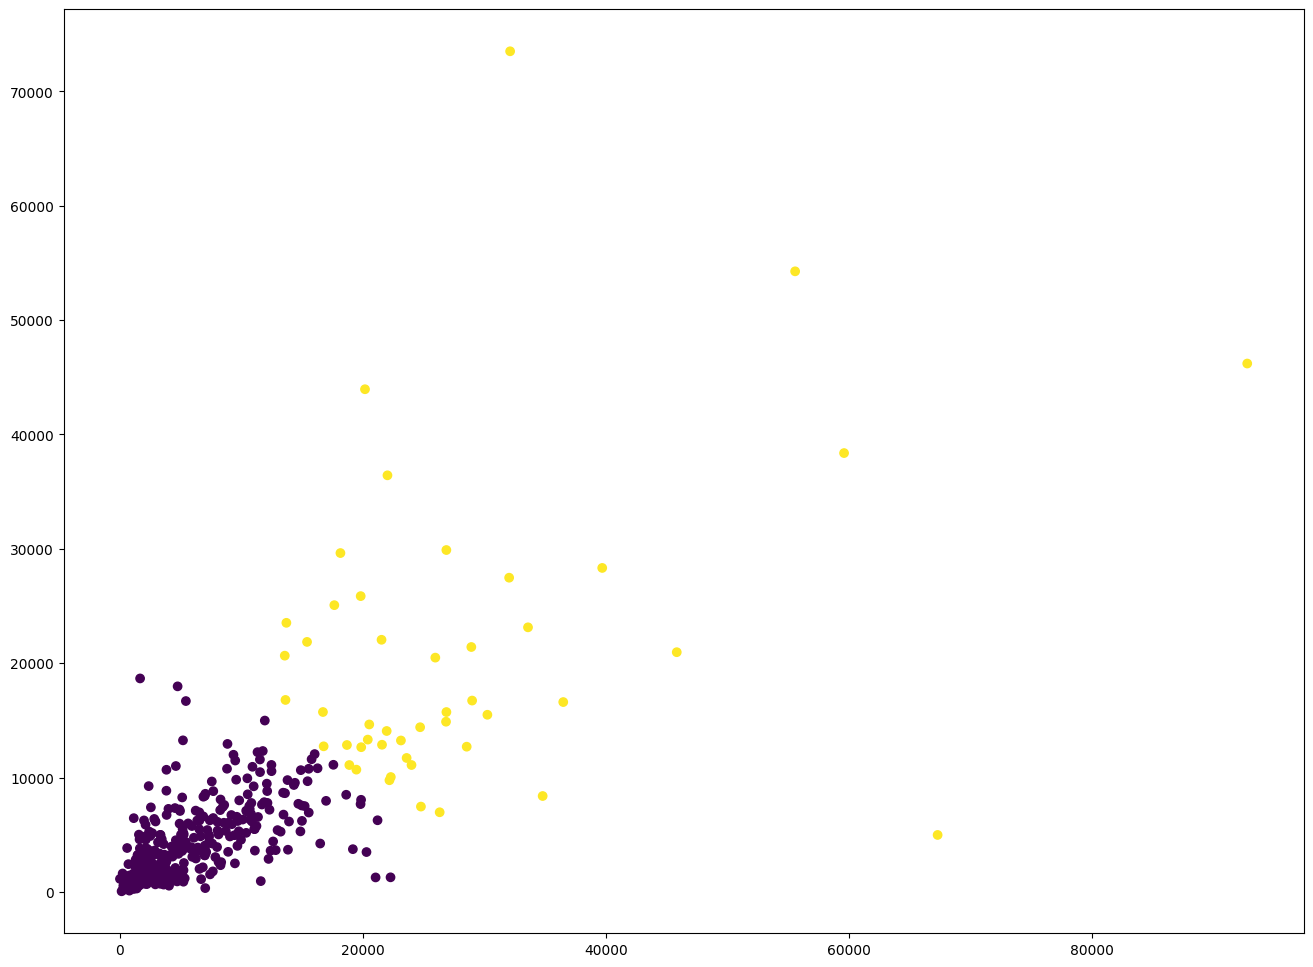

In [ ]:
plt.scatter(clusters['Grocery'],clusters['Milk'],c=clusters['label'])

In [ ]:
#DBSCAN

In [ ]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 28.1MB/s]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('wholesaledata.csv')

In [ ]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
#dropping categorical features for simplicity
df.drop(['Channel','Region'],axis=1,inplace=True)

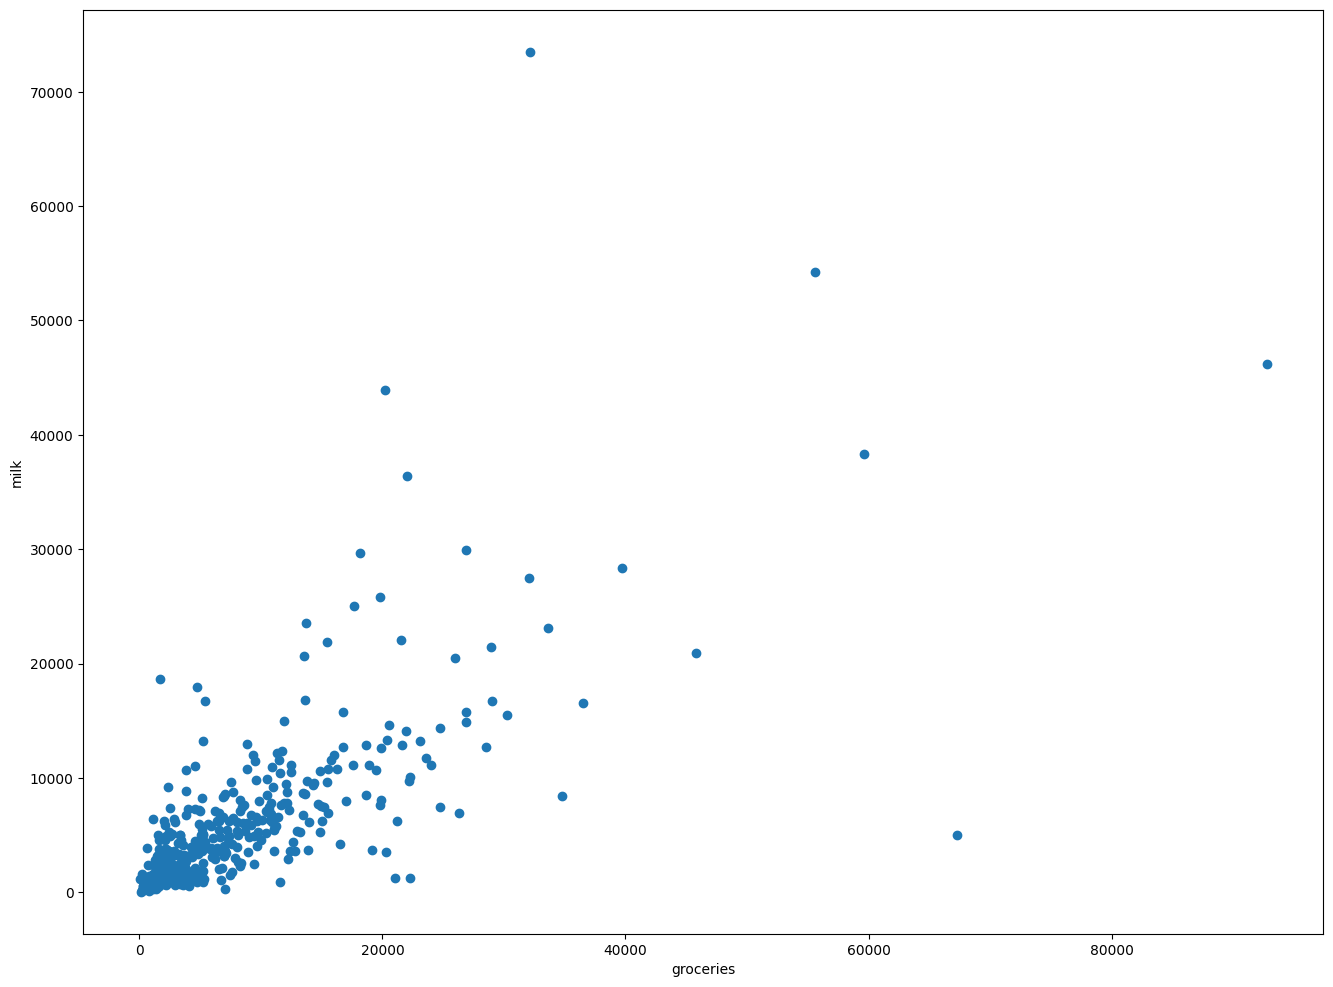

In [ ]:
x=df['Grocery']
y=df['Milk']
plt.scatter(x,y)
plt.xlabel('groceries')
plt.ylabel('milk')
plt.show()

In [ ]:
df=df[['Grocery','Milk']]
std_scaler=StandardScaler().fit(df)
std_df=std_scaler.transform(df)

In [ ]:
from sklearn.cluster import KMeans
k=2 #arbitrary value
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster=df.copy()
cluster['label']=kmeans.labels_

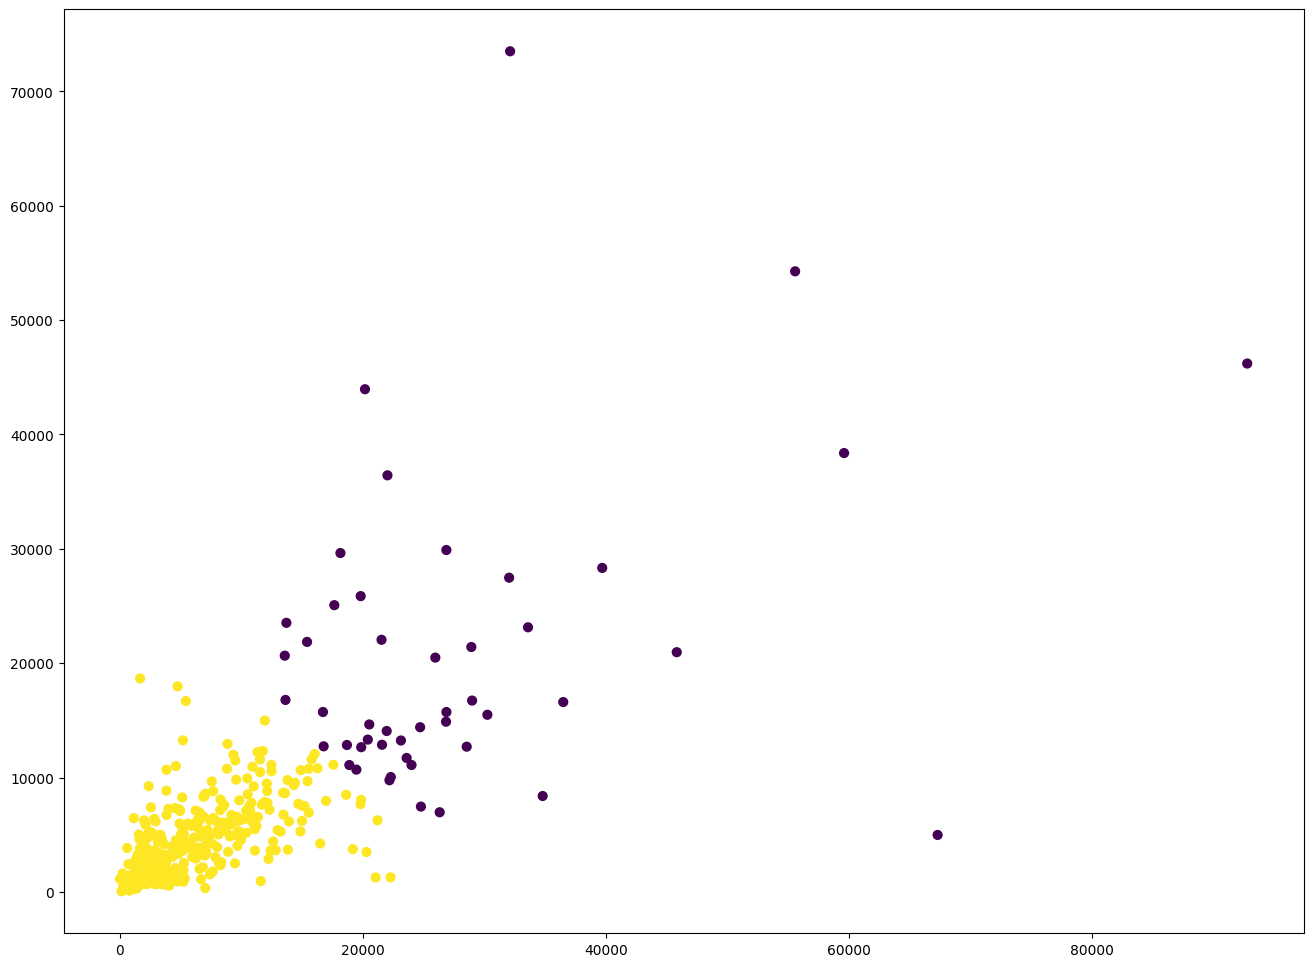

In [ ]:
plt.scatter(cluster['Grocery'],cluster['Milk'],s=40,c=cluster['label'])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
agc_pred=agc.fit_predict(std_df)
cluster['agc label']=agc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


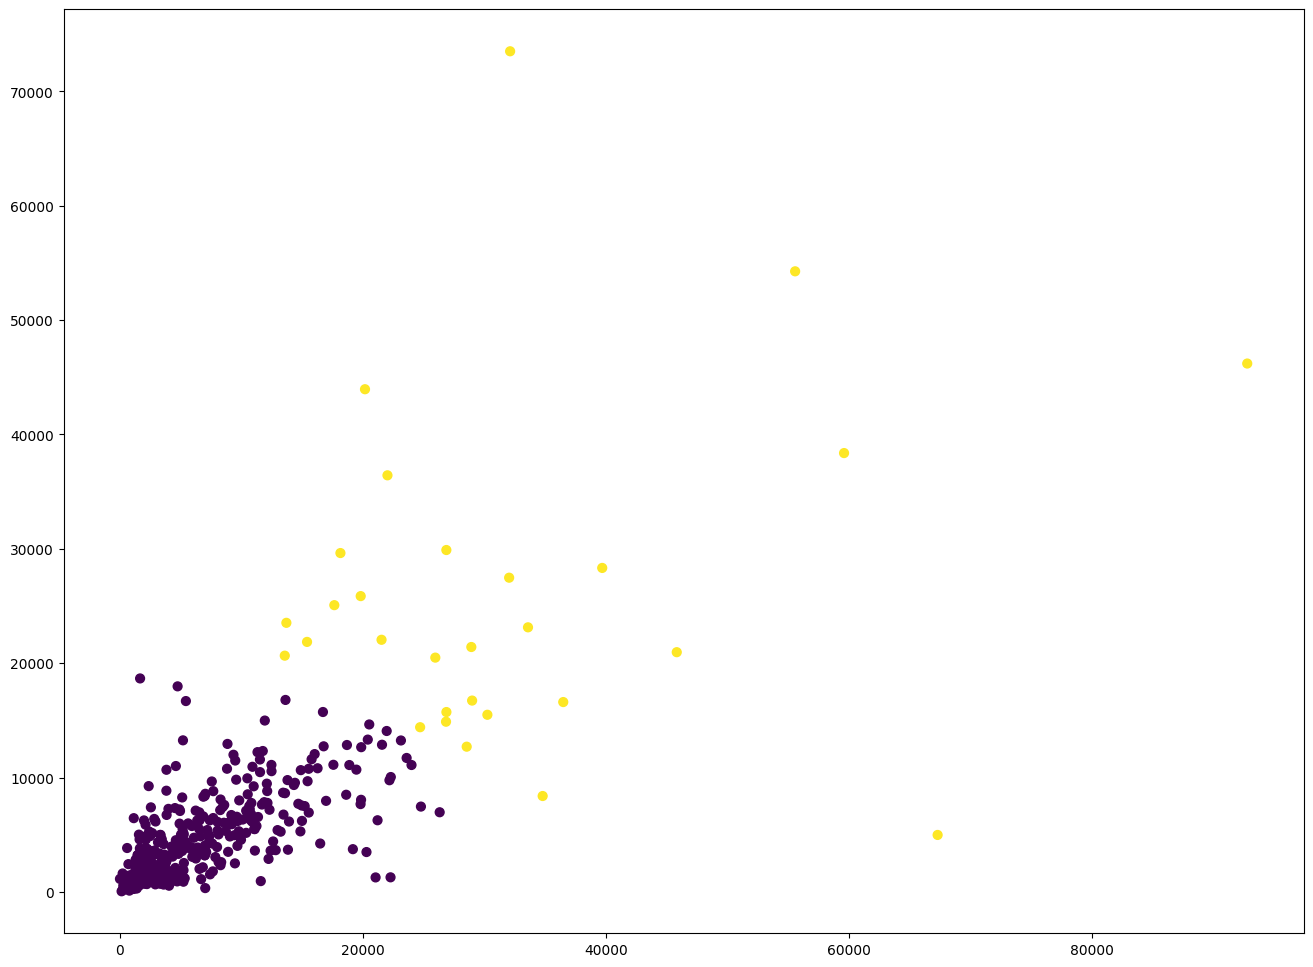

In [ ]:
plt.scatter(cluster['Grocery'],cluster['Milk'],s=40,c=cluster['agc label'])

In [ ]:
# fit and transform using DBSCAN

In [ ]:
dbsc=DBSCAN(eps=0.5,min_samples=15).fit(std_df)

In [ ]:
labels=dbsc.labels_

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
out_df=df.copy()
out_df['label']=dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 0    404
-1     36
Name: label, dtype: int64

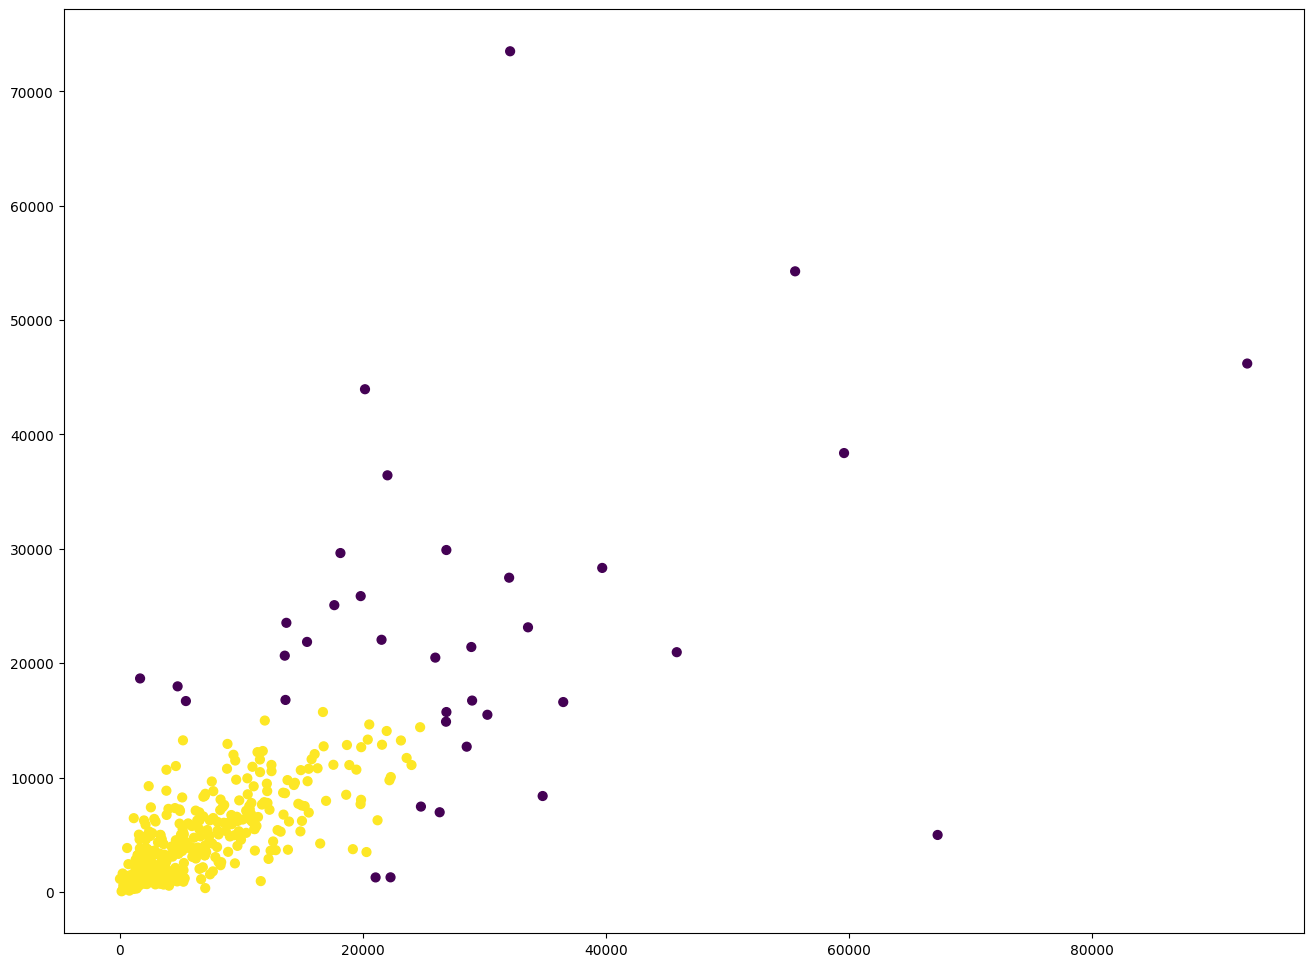

In [ ]:
plt.scatter(out_df['Grocery'],out_df['Milk'],s=40,c=out_df['label'])

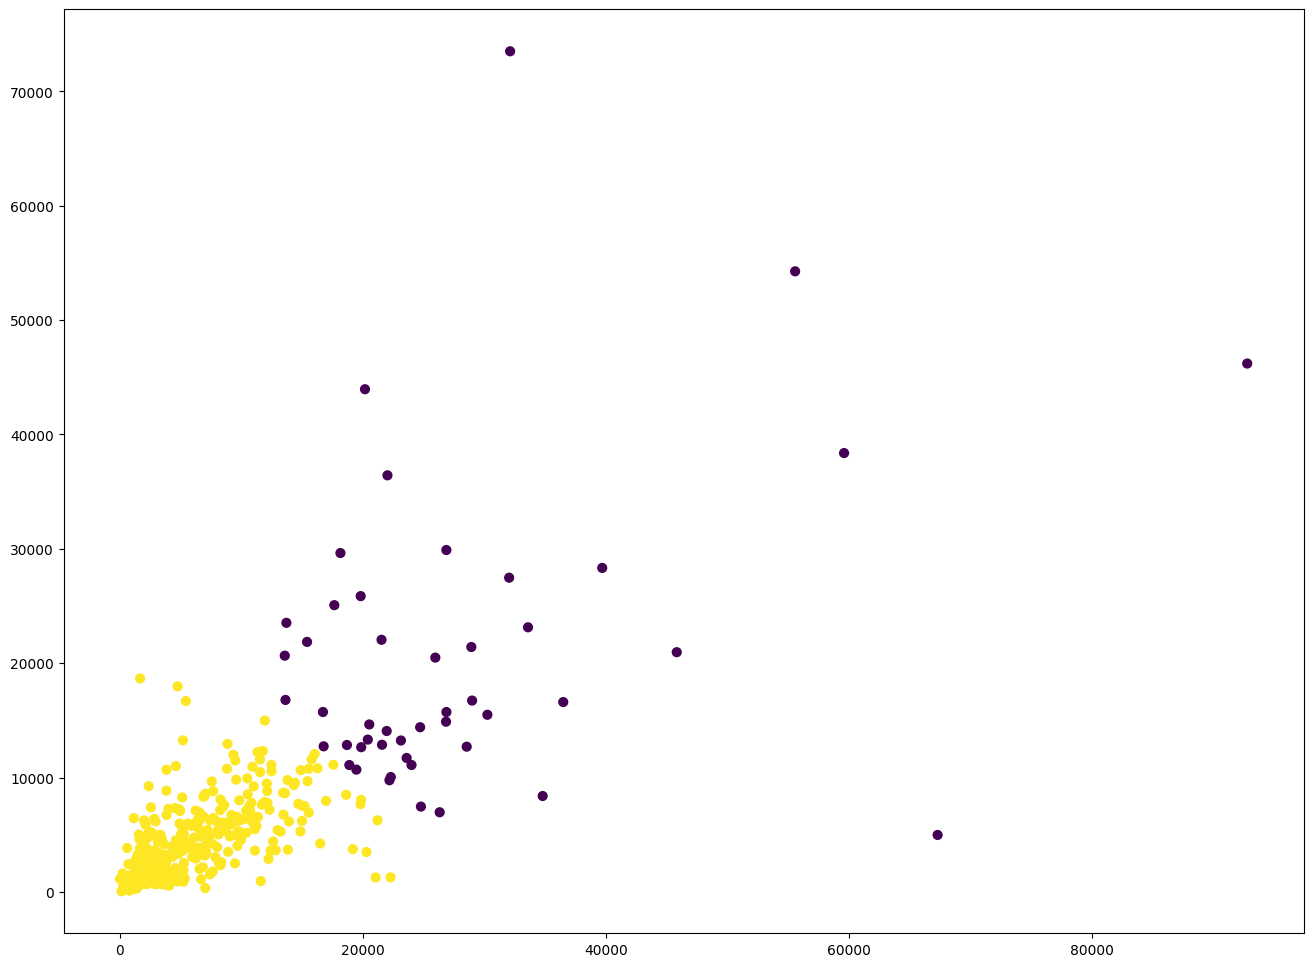

In [ ]:
#Comparing with K-Means
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

In [ ]:
# anomaly detection

In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 37.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df=pd.read_csv('AnomalyDetection.csv')
df.head()

Mileage      Price
0  54.282388  67.967708
1  17.331911  70.023637
2  36.548113  68.080455
3  42.567541  71.058755
4   5.608853  57.822432

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  908 non-null    float64
 1   Price    908 non-null    float64
dtypes: float64(2)
memory usage: 14.3 KB


In [ ]:
df.describe()

Mileage       Price
count  908.000000  908.000000
mean    45.869736   77.555036
std     30.598219   19.275677
min      1.398964   20.000000
25%     25.415487   64.435773
50%     34.599453   73.550501
75%     49.862529   88.939217
max    128.604249  141.201890

Text(0, 0.5, 'Price')

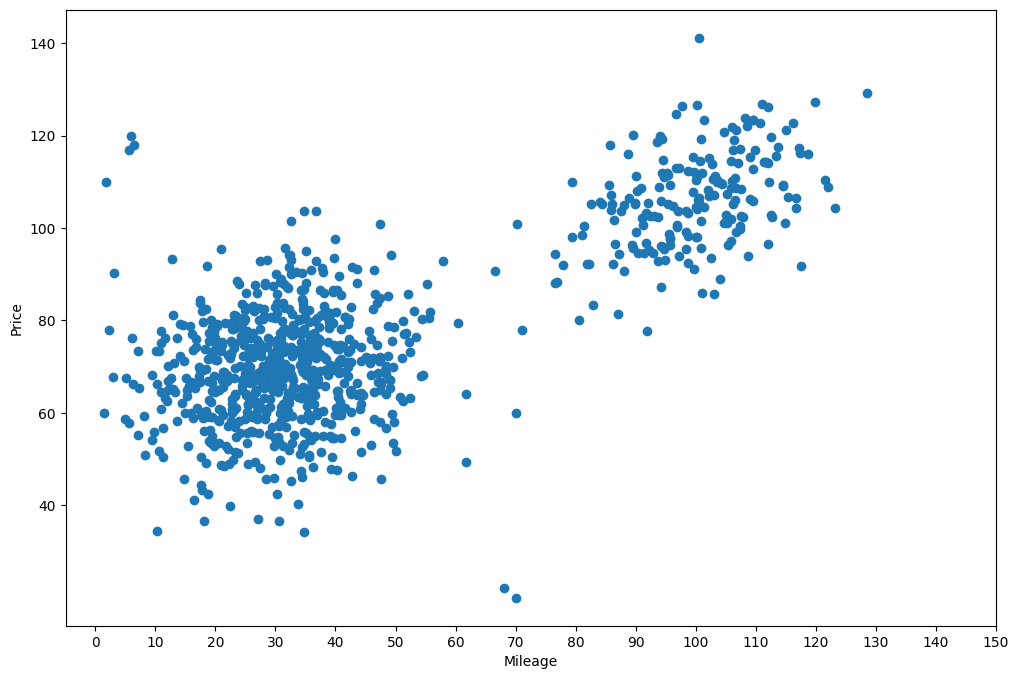

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

In [ ]:
#elliptic envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(df)
ee_pred = cov.predict(df)

In [ ]:
df['is_outlier_ee']=ee_pred

In [ ]:
cov.predict([[25, 50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


array([1])

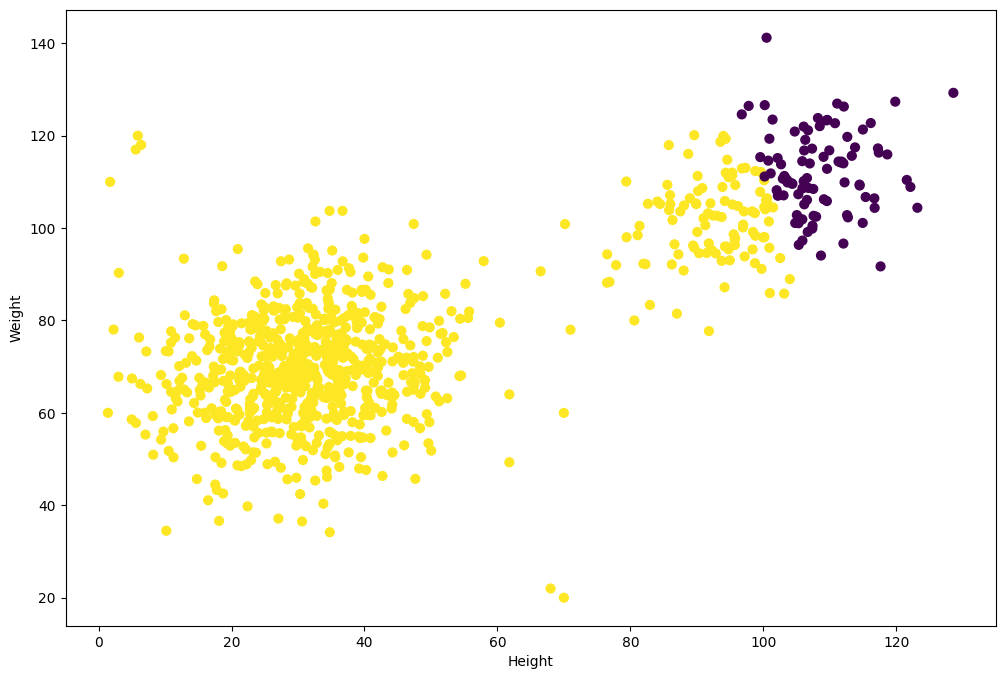

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
#isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(random_state=0, contamination = 0.08).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


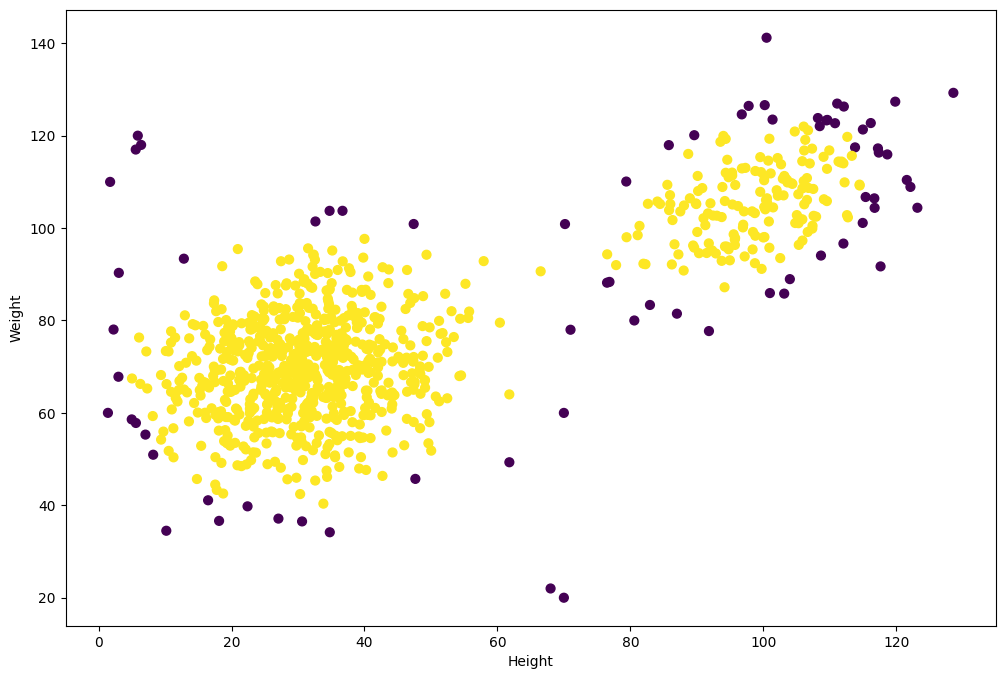

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
# LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.065).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

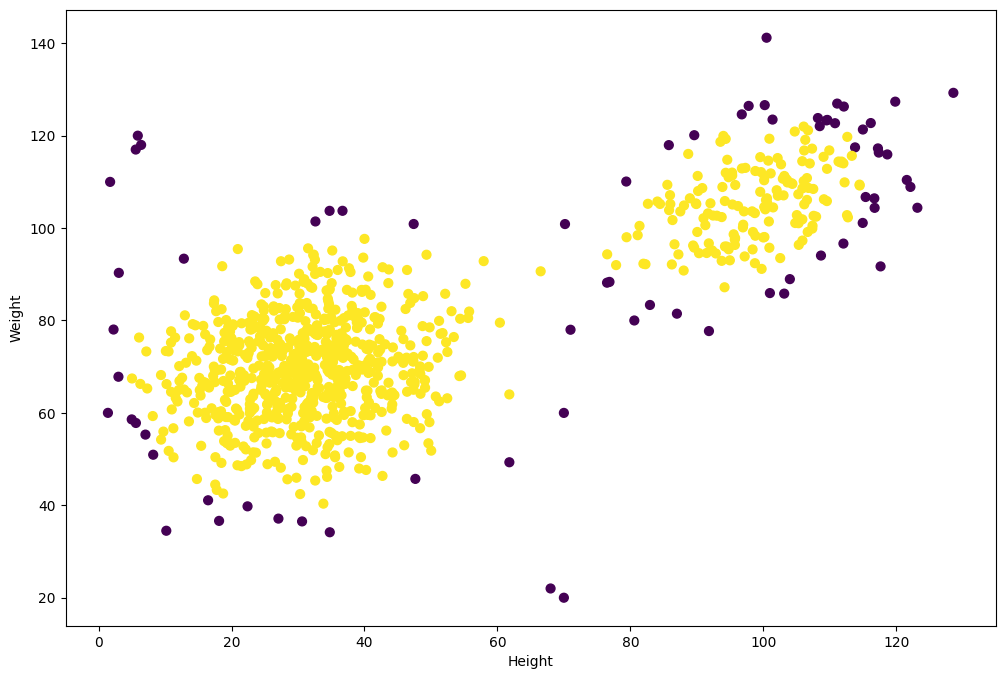

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
#PCA

In [ ]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 2.15MB/s]


In [ ]:
data=pd.read_csv('pca_2d_data.csv')
data.head()

f1        f2
0  2.038772  1.102760
1  0.869536  0.238030
2  1.795888  1.020364
3  0.103510 -0.513661
4  1.479554  0.750702

In [ ]:
data.shape

(20, 2)

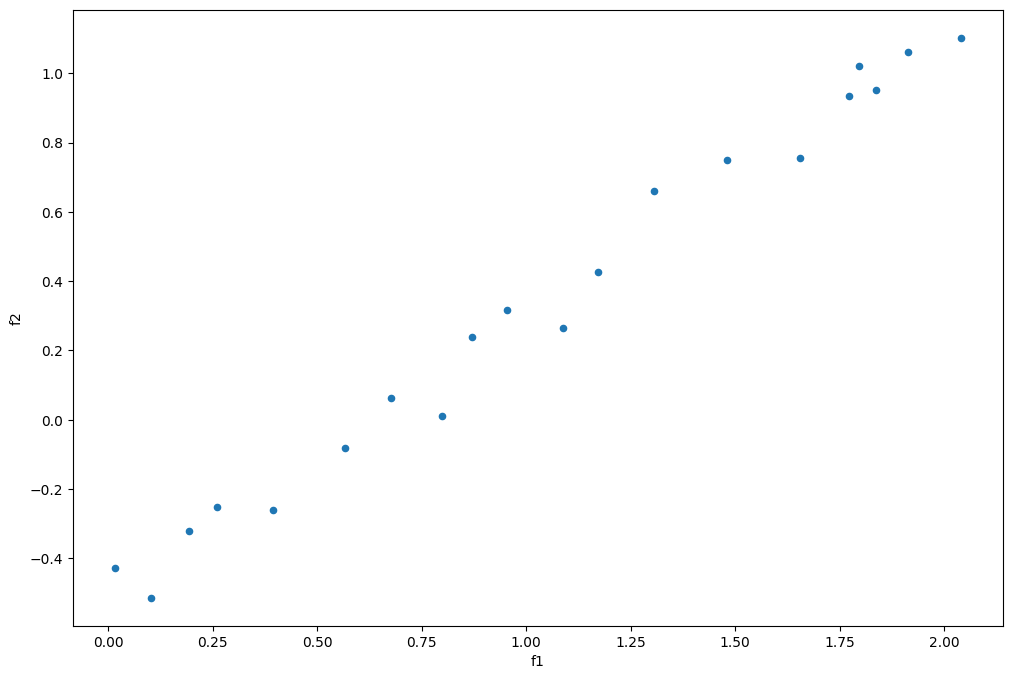

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

In [ ]:
## Implement PCA!!
# Step 1: Column standardization
x_data = data['f1'].values
y_data = data['f2'].values
mean_x = np.mean(x_data)
mean_y = np.mean(y_data)
std_x = np.std(x_data)
std_y = np.std(y_data)
x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y
X_st = np.zeros((len(x_data), 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

In [ ]:
# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data)-1)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)
eigenvectors = eigenvectors.T
#  thats how we want them (horizontal) print(eigenvalues)

In [ ]:
# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
X_prime = eigenvectors[0].dot(X_st.T)
X_prime_reduced = X_prime

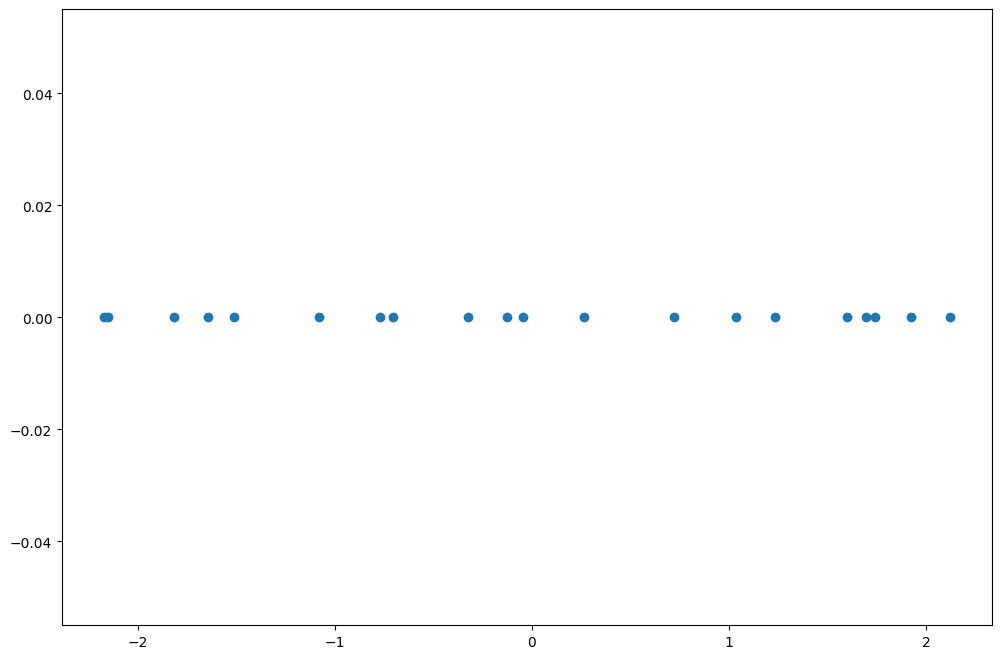

In [ ]:
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

In [ ]:
eigenvectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

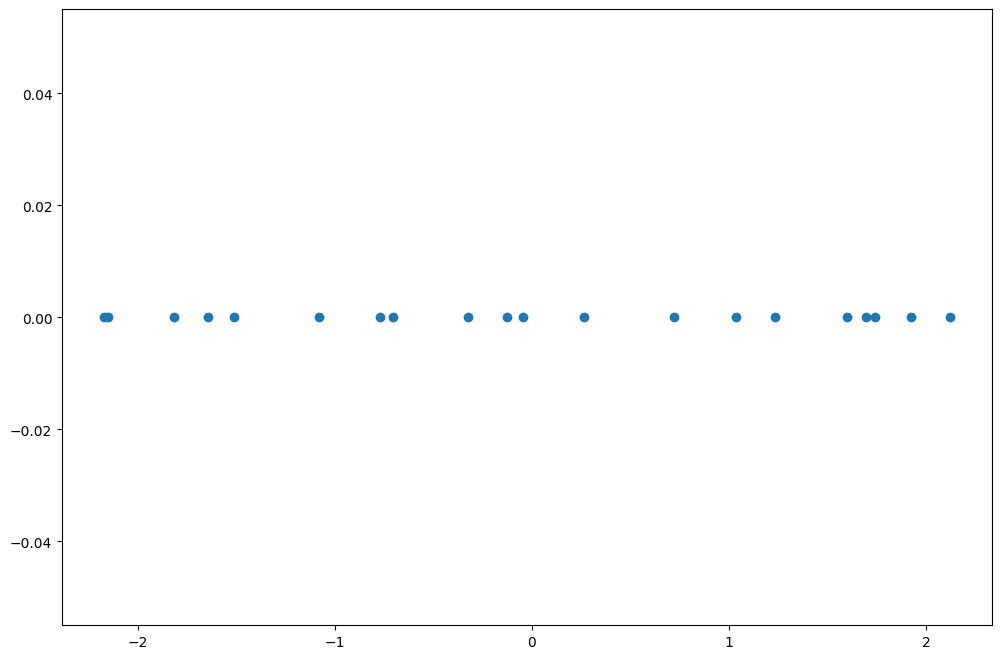

In [ ]:
from sklearn.preprocessing import StandardScaler
data_sc = StandardScaler().fit_transform(data)
cov = np.cov(data_sc.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
eigenvectors = eigenvectors.T # We want like this print(eigenvalues)
X_prime_reduced = eigenvectors[0].dot(data_sc.T) # Step 4: Visualize plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

In [ ]:
eigenvalues

array([2.09718701, 0.00807615])

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_p = pca.fit_transform(data_sc)
print(pca.explained_variance_)

[2.09718701 0.00807615]


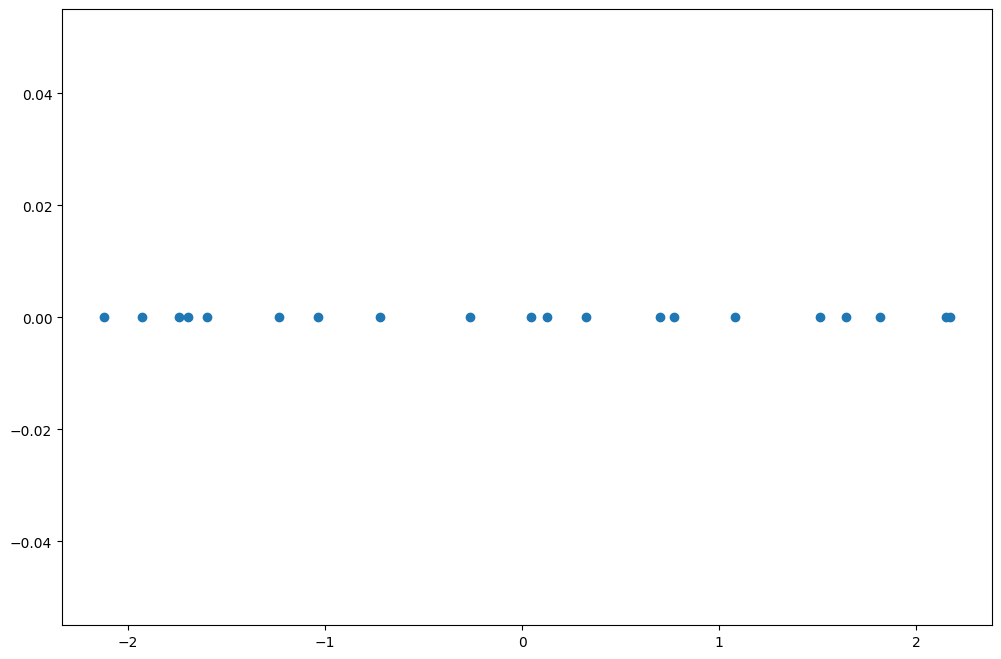

In [ ]:
plt.figure()
plt.scatter(X_p[:, 0], np.zeros((len(data_sc),)))
plt.show()

In [ ]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
pca.explained_variance_

array([2.09718701, 0.00807615])

In [ ]:
pca.explained_variance_ratio_

array([0.99616383, 0.00383617])

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
x=digits.data
y=digits.target

In [ ]:
x.shape

(1797, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

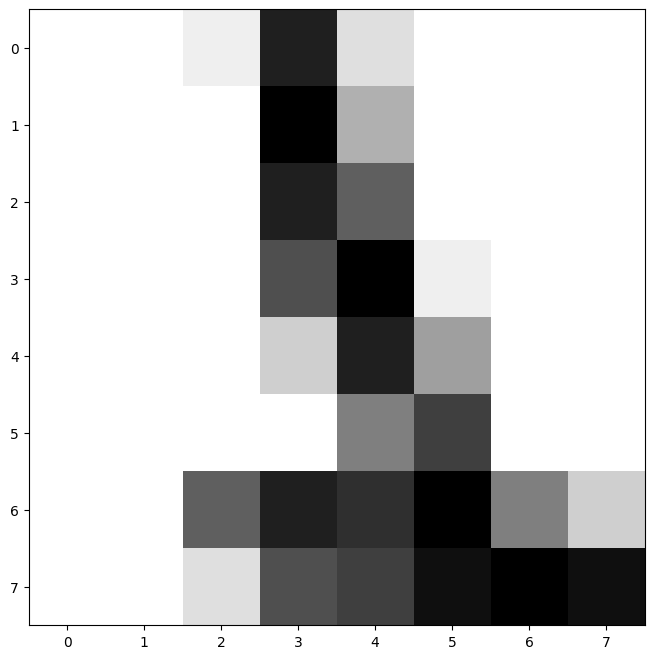

In [ ]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r)

In [ ]:
%%time
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(x)
Z1 = pca_2D.transform(x)

CPU times: user 24.7 ms, sys: 31.4 ms, total: 56.1 ms
Wall time: 90.2 ms


In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(y))))

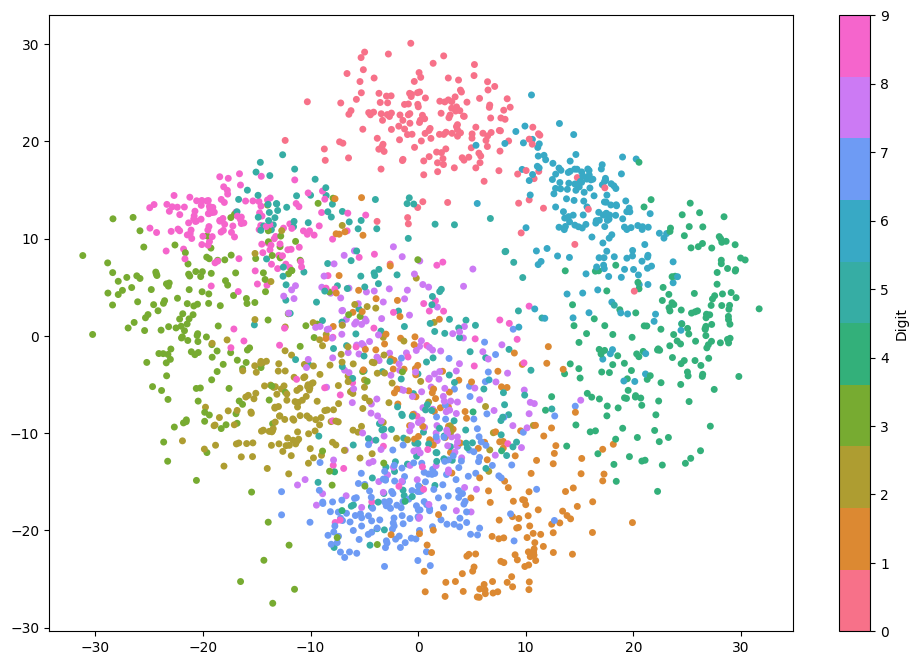

In [ ]:
fig, ax = plt.subplots()
#on x-axis we use 0th dimension of z1 on y-axis we use 1th dimension of z2
im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [ ]:
decomposition.PCA(n_components=2).fit(x).explained_variance_ratio_.sum()

0.2850936482368361

In [ ]:
#T-SNE

In [ ]:
!pip install openTSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.2 MB/s eta 0:00:00


In [ ]:
from openTSNE import TSNE

In [ ]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(x)

CPU times: user 1min 34s, sys: 11.8 s, total: 1min 46s
Wall time: 2min 4s


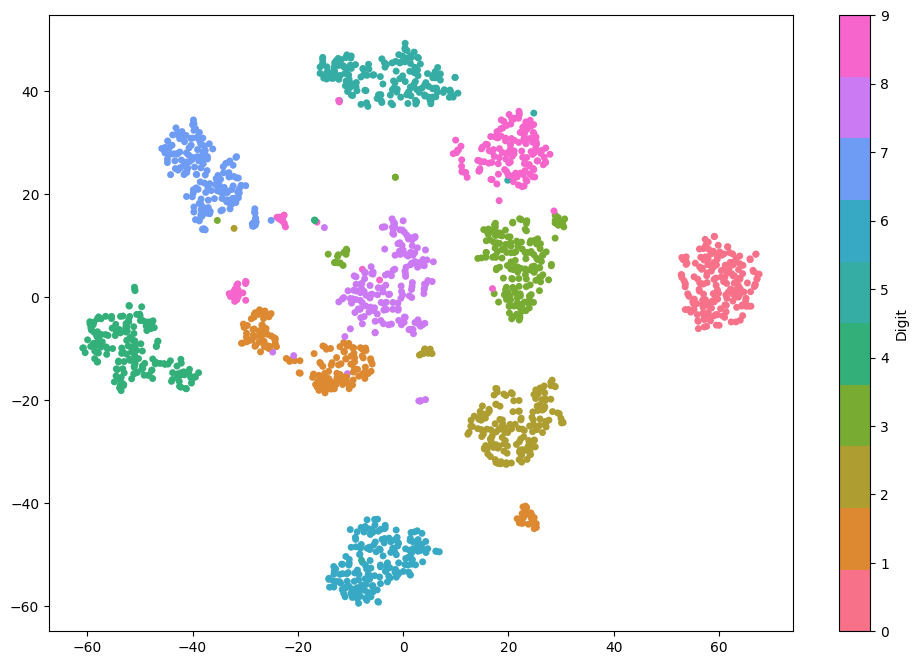

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [ ]:
#UMAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1a7a1d83f2ec8afe28b2185a4892167e64c7703bd427d9aaf7271093bfe1bfb1
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from umap import UMAP

In [ ]:
%%time
Z3 = UMAP(init='random', random_state=42).fit_transform(x)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 18.9 s, sys: 158 ms, total: 19 s
Wall time: 28.6 s


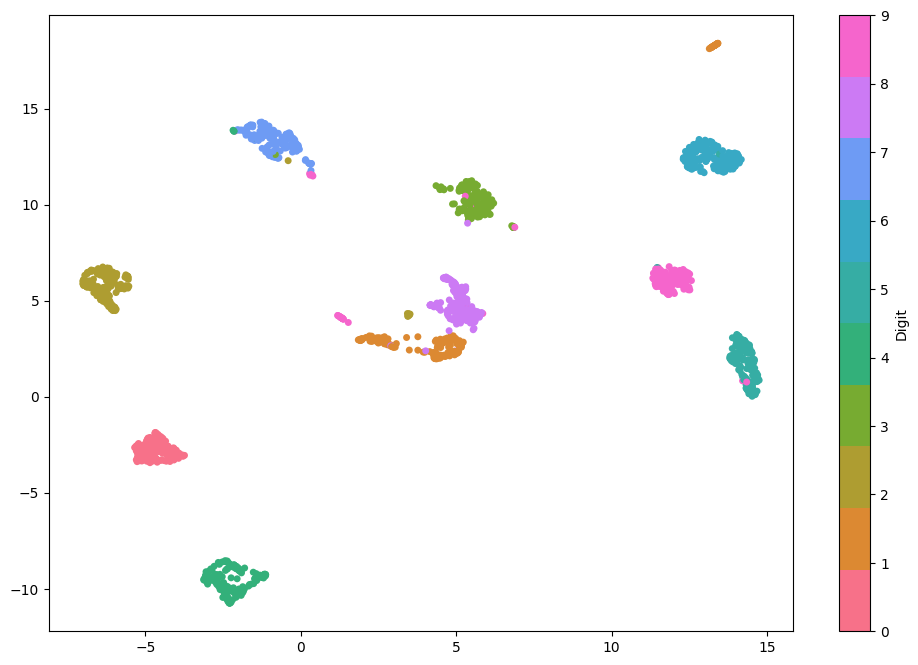

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z3[:,0], Z3[:,1], s=25, c=y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')